In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/sensor.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [ ]:
# Drop duplicates
df = df.drop_duplicates()
# Entire "sensor_15" column is NaN therefore remove it from data
del df['sensor_15']

In [ ]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(df).head(10)

percent
sensor_50  0.349569
sensor_51  0.069821
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327

In [ ]:
df[['sensor_50', 'sensor_51', 'sensor_00', 'sensor_07', 'sensor_08', 'sensor_06', 'sensor_09']].describe().T

count        mean         std        min         25%  \
sensor_50  143303.0  183.049260   65.258650  27.488426  167.534700   
sensor_51  204937.0  202.699667  109.588607  27.777779  179.108800   
sensor_00  210112.0    2.372221    0.412227   0.000000    2.438831   
sensor_07  214869.0   15.843152    2.201155   0.000000   15.907120   
sensor_08  215213.0   15.200721    2.037390   0.028935   15.183740   
sensor_06  215522.0   13.501537    2.163736   0.014468   13.346350   
sensor_09  215725.0   14.799210    2.091963   0.000000   15.053530   

                  50%         75%          max  
sensor_50  193.865700  219.907400  1000.000000  
sensor_51  197.338000  216.724500  1000.000000  
sensor_00    2.456539    2.499826     2.549016  
sensor_07   16.167530   16.427950    23.596640  
sensor_08   15.494790   15.697340    24.348960  
sensor_06   13.642940   14.539930    22.251160  
sensor_09   15.082470   15.118630    25.000000

In [ ]:
df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [ ]:
# Let's take a look at top ten columns with missing values
calc_percent_NAs(df).head(10)

percent
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327
sensor_32  0.000309
sensor_18  0.000209
sensor_17  0.000209
sensor_22  0.000186
sensor_25  0.000163
sensor_16  0.000141
sensor_45  0.000123

In [ ]:
df_tidy = df.dropna()

In [ ]:
# Let's convert the data type of timestamp column to datatime format
import warnings
warnings.filterwarnings("ignore")
df_tidy['date'] = pd.to_datetime(df_tidy['timestamp'])
del df_tidy['timestamp']

In [ ]:
df_tidy = df_tidy.set_index('date')
df_tidy.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
date                 ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
date                                                                         
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   

                     machine_status  
date                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 52 columns]

In [ ]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219521 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       219521 non-null  float64
 1   sensor_01       219521 non-null  float64
 2   sensor_02       219521 non-null  float64
 3   sensor_03       219521 non-null  float64
 4   sensor_04       219521 non-null  float64
 5   sensor_05       219521 non-null  float64
 6   sensor_06       219521 non-null  float64
 7   sensor_07       219521 non-null  float64
 8   sensor_08       219521 non-null  float64
 9   sensor_09       219521 non-null  float64
 10  sensor_10       219521 non-null  float64
 11  sensor_11       219521 non-null  float64
 12  sensor_12       219521 non-null  float64
 13  sensor_13       219521 non-null  float64
 14  sensor_14       219521 non-null  float64
 15  sensor_16       219521 non-null  float64
 16  sensor_17       219521

In [ ]:
# Write the dataframe to csv 
df_tidy.to_csv('sensor_cleaned.csv')

In [ ]:
# import the tidy data
df=pd.read_csv('/content/sensor_cleaned.csv')

In [ ]:
df.head()

date  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 53 columns]

In [ ]:
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
date                 ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
date                                                                         
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   

                     machine_status  
date                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 52 columns]

In [ ]:
# Let's count the unique values of one of the columns
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

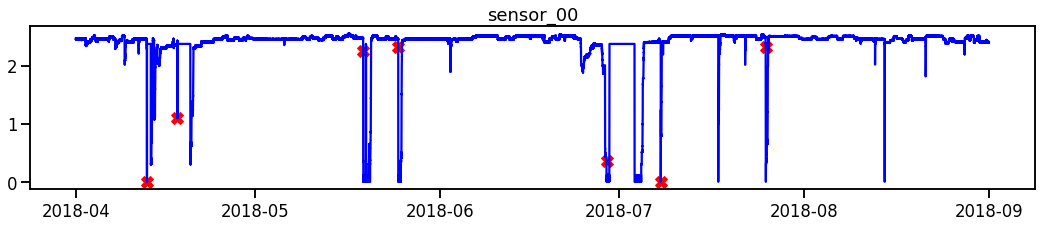

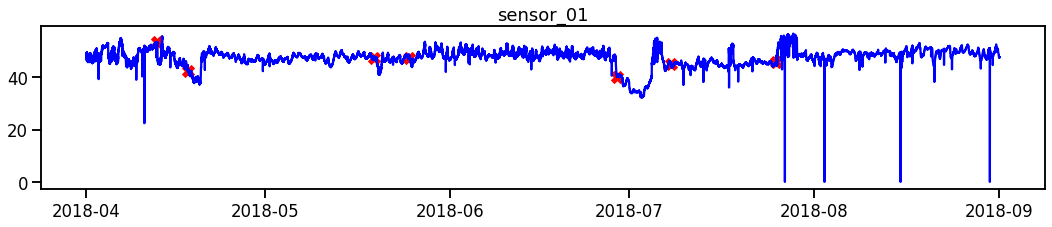

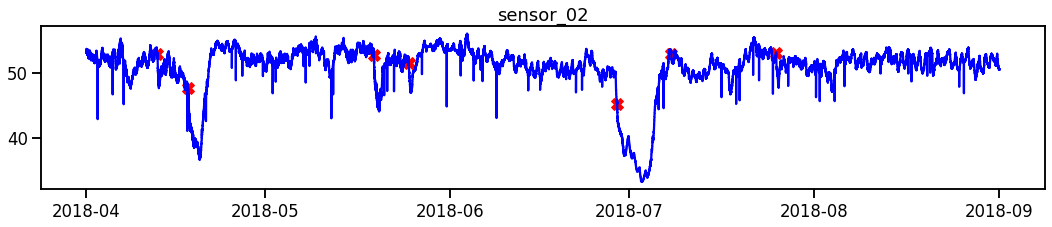

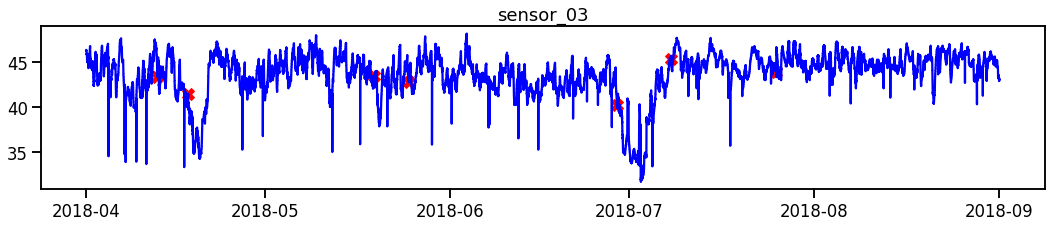

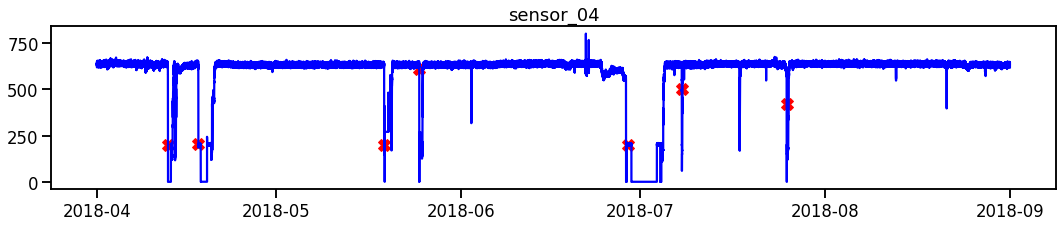

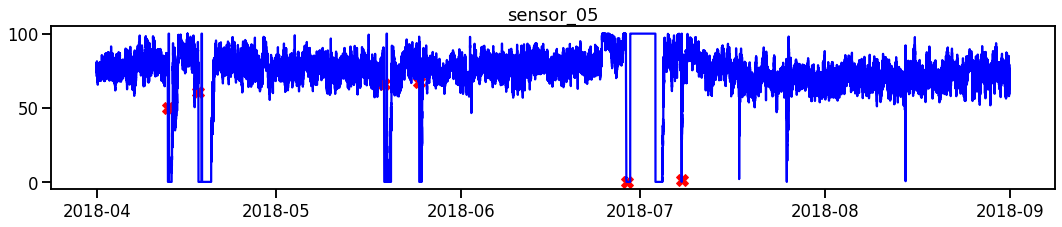

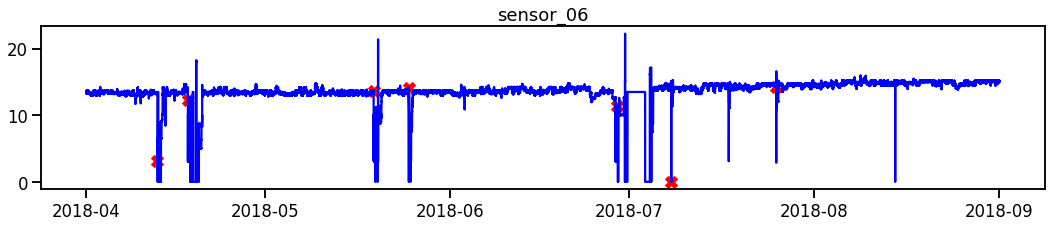

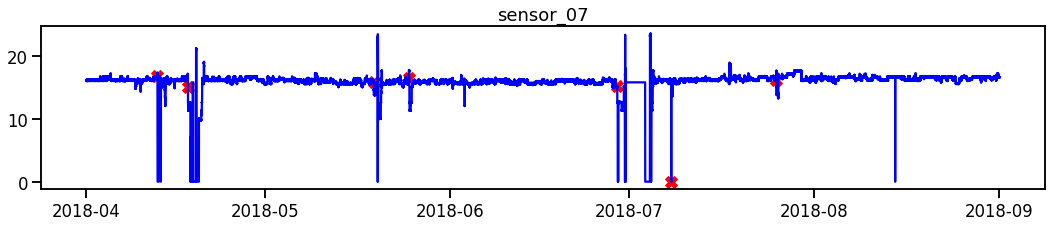

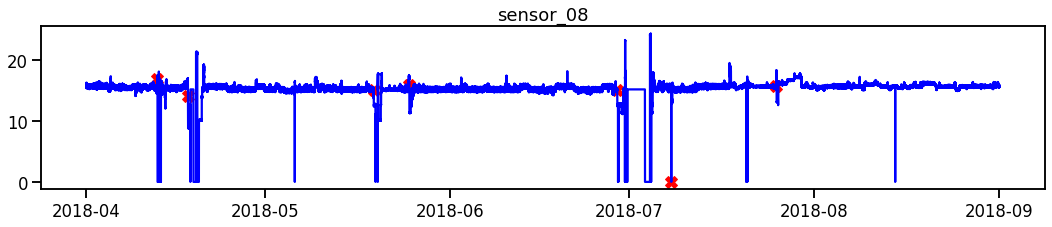

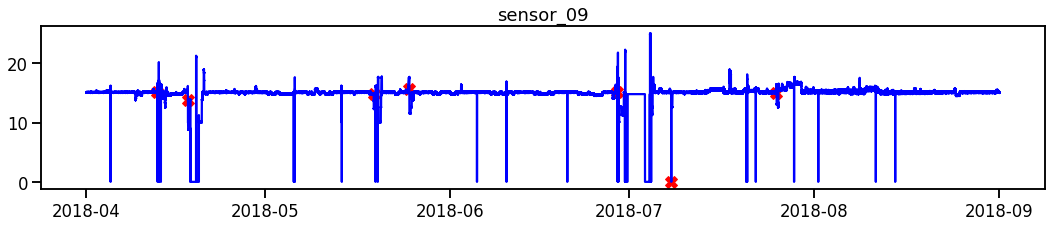

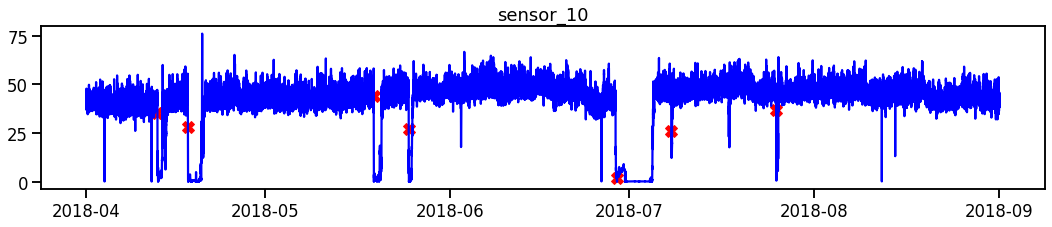

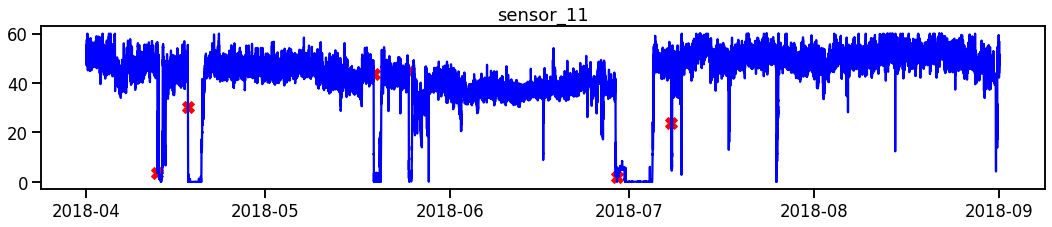

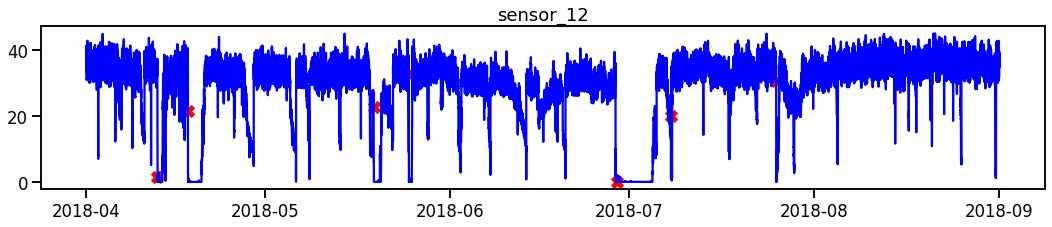

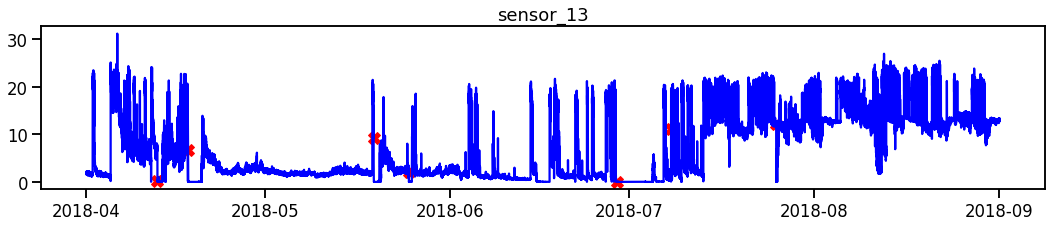

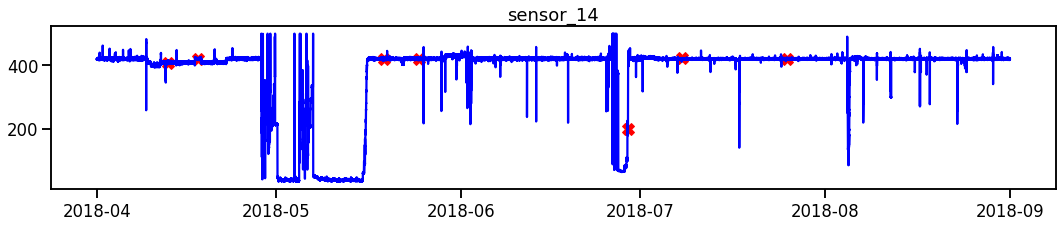

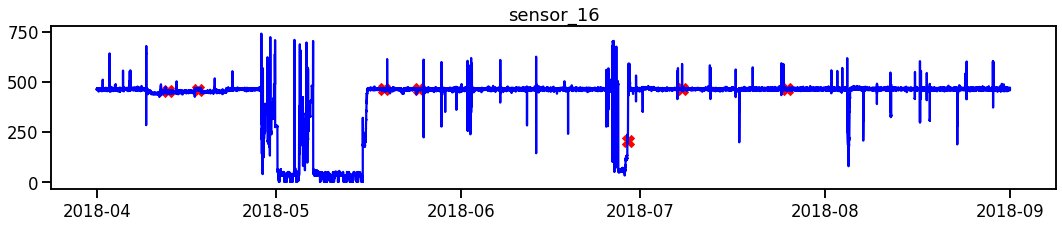

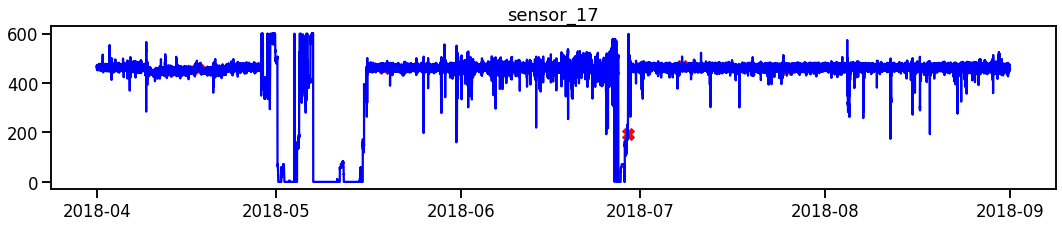

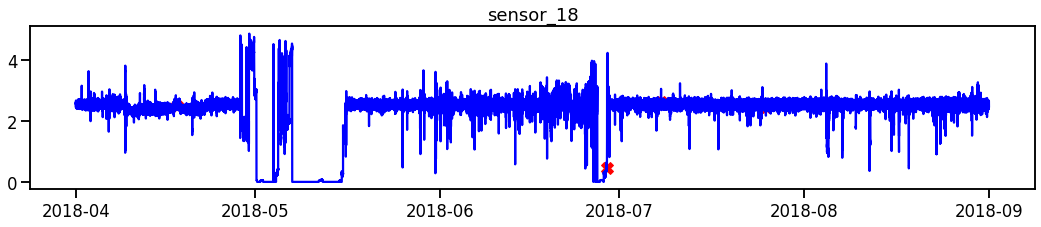

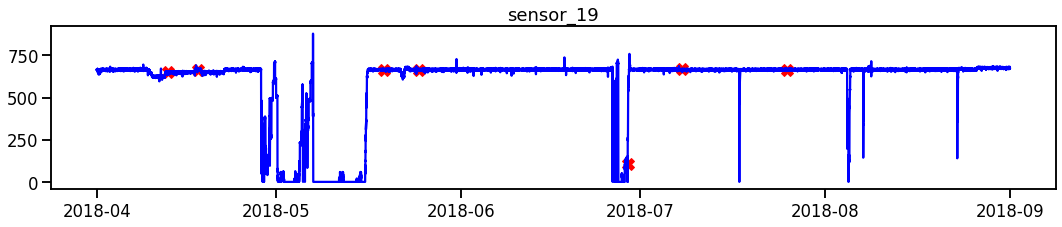

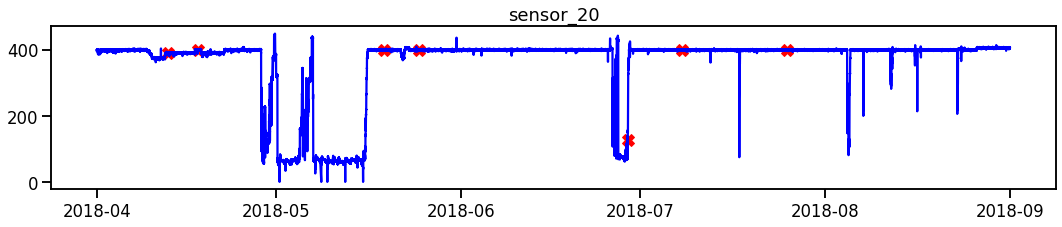

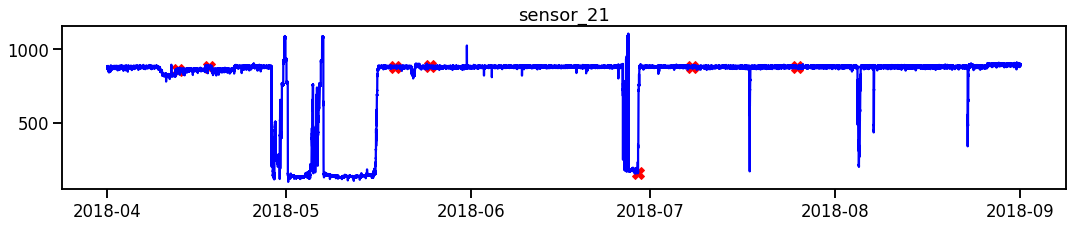

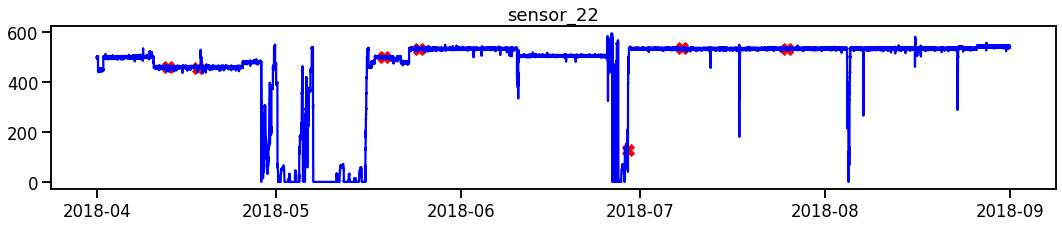

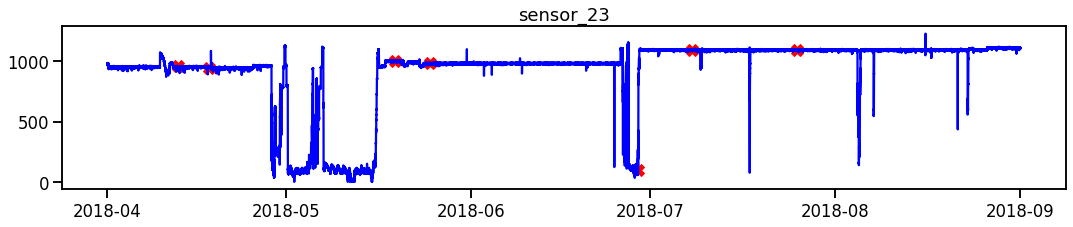

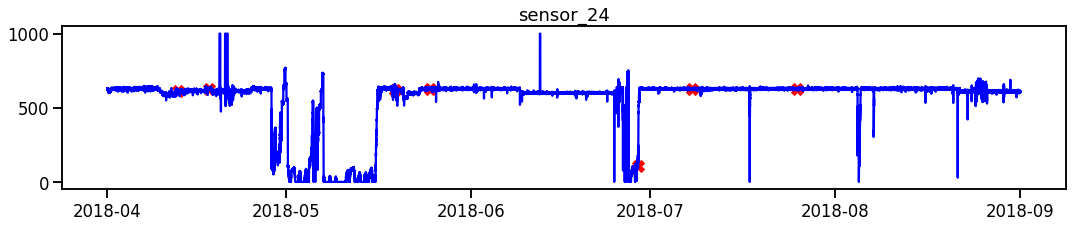

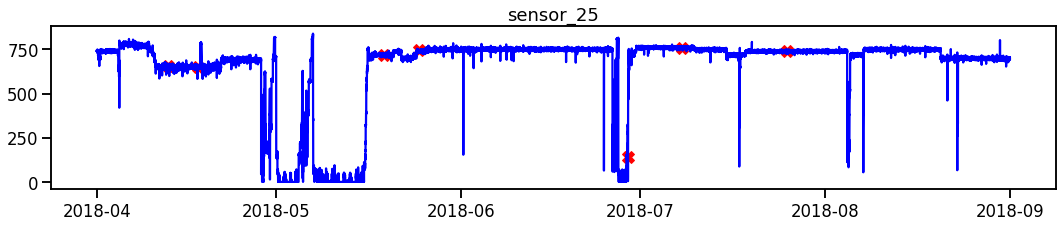

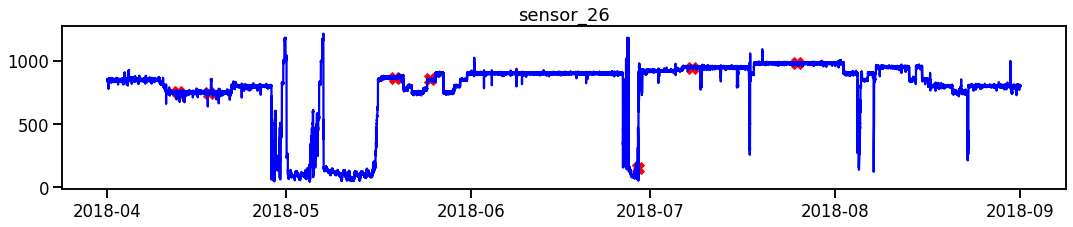

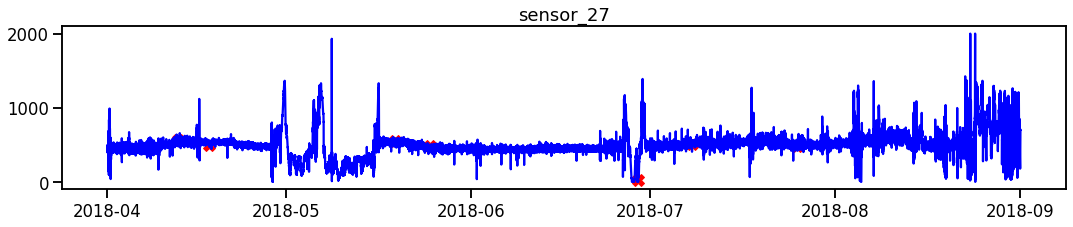

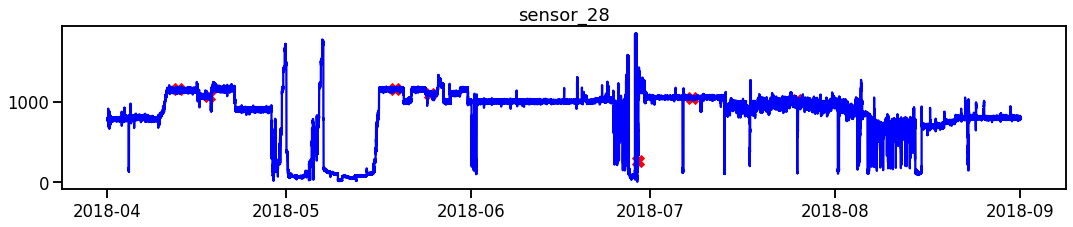

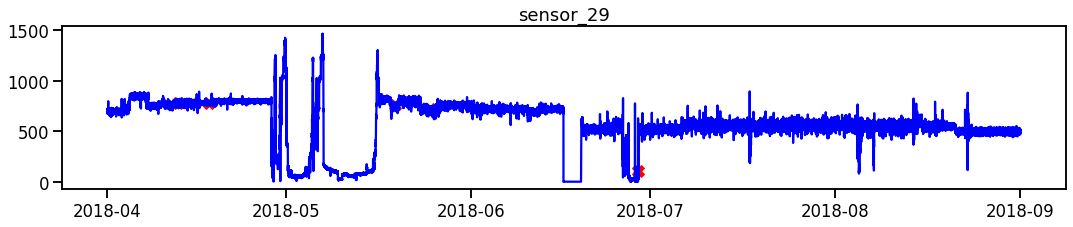

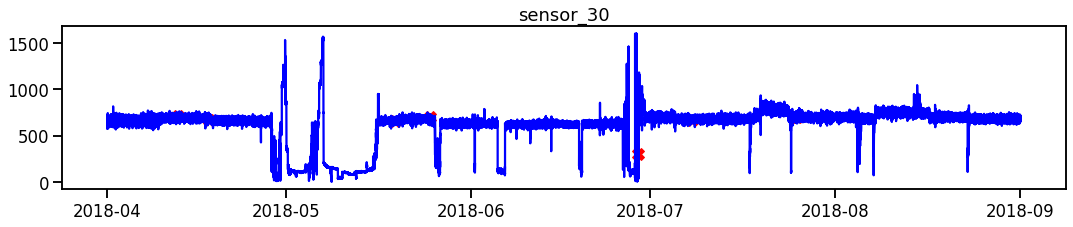

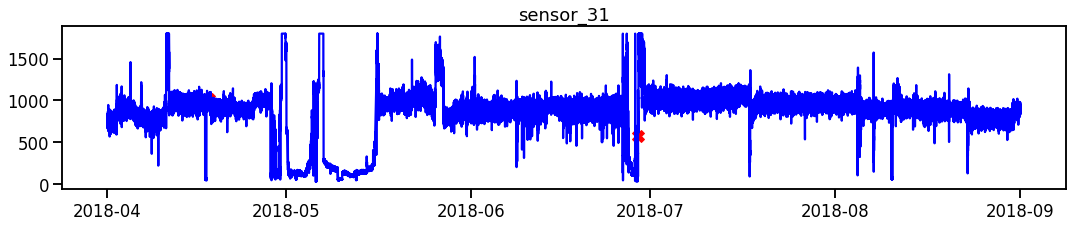

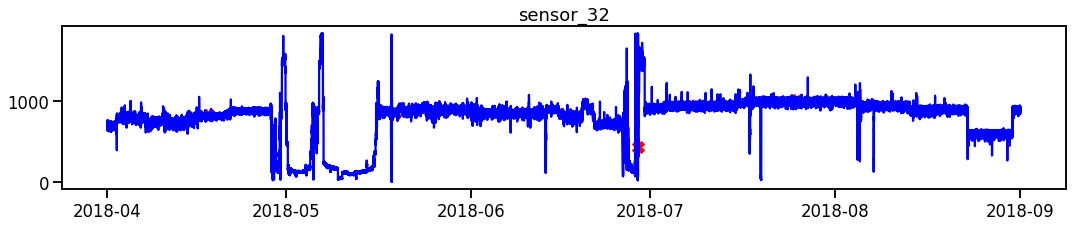

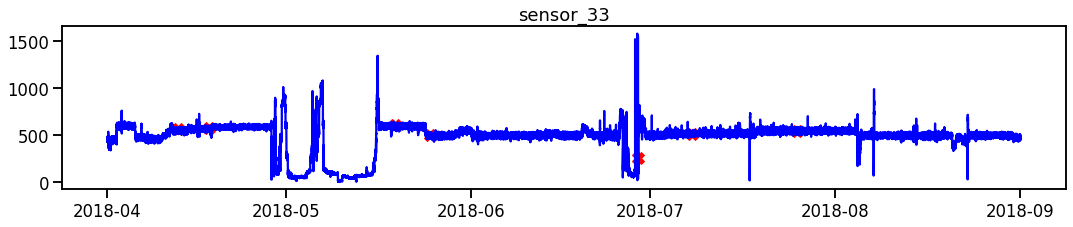

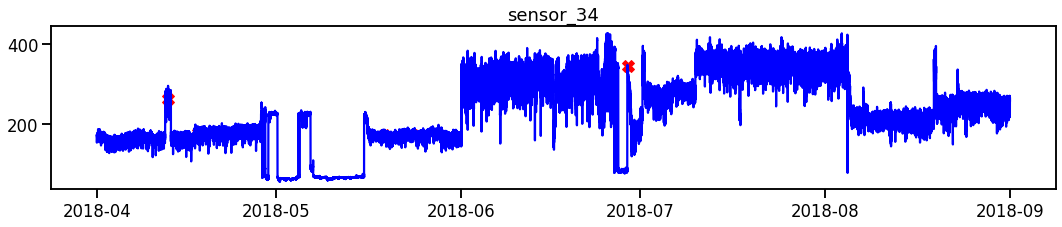

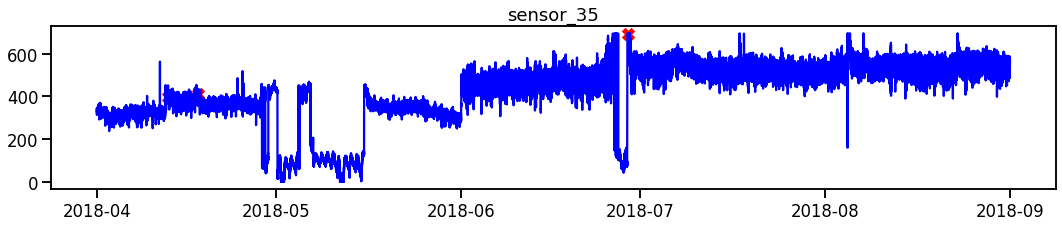

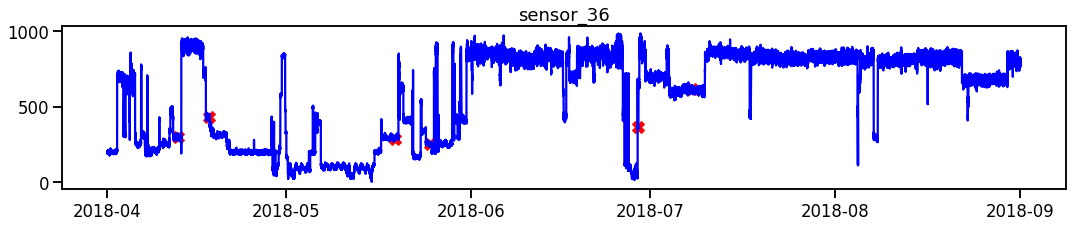

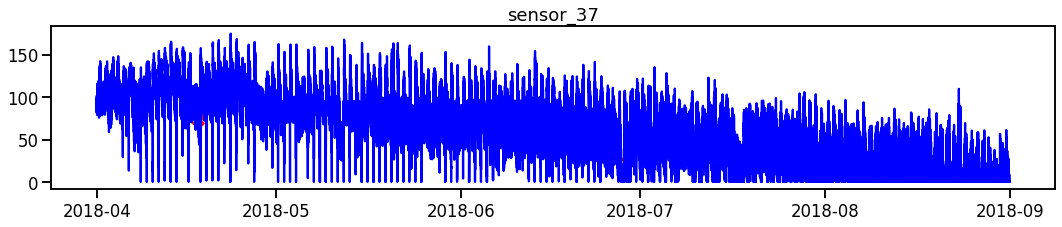

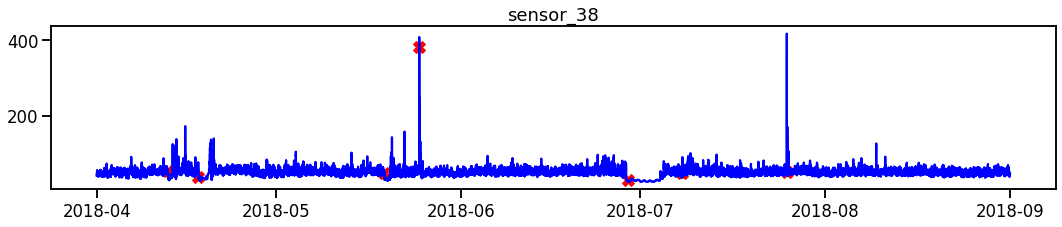

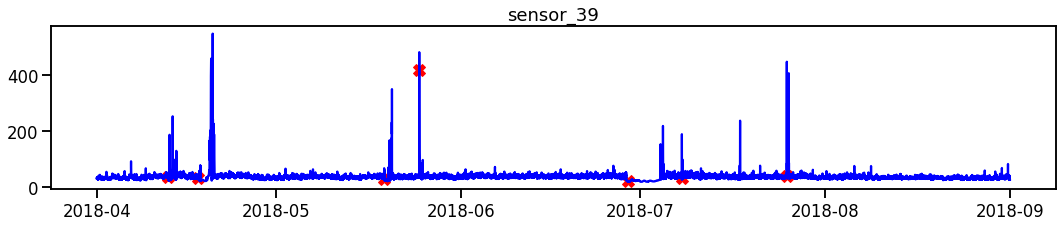

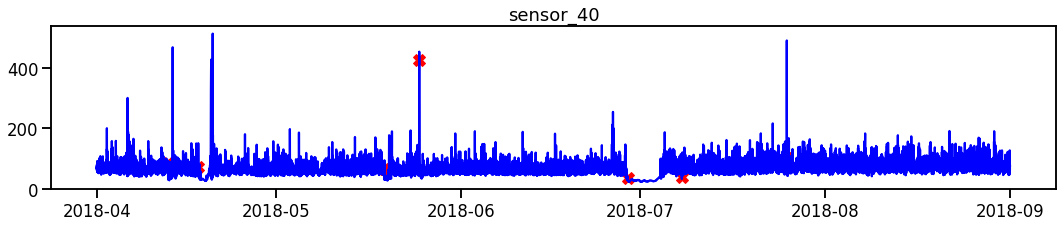

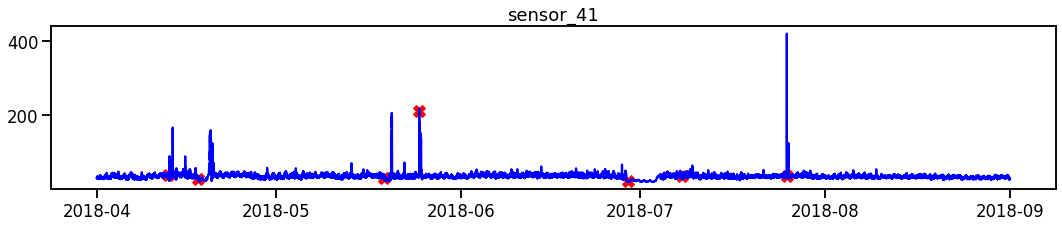

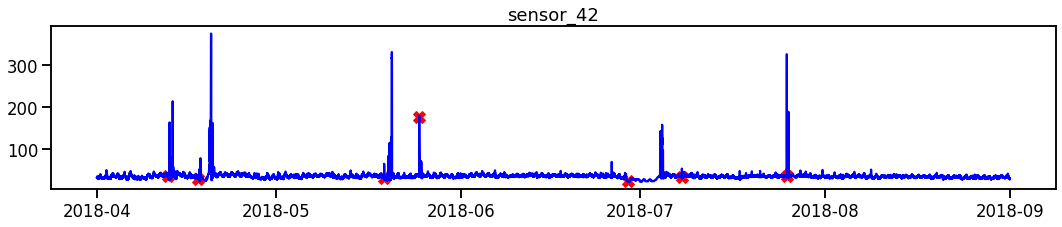

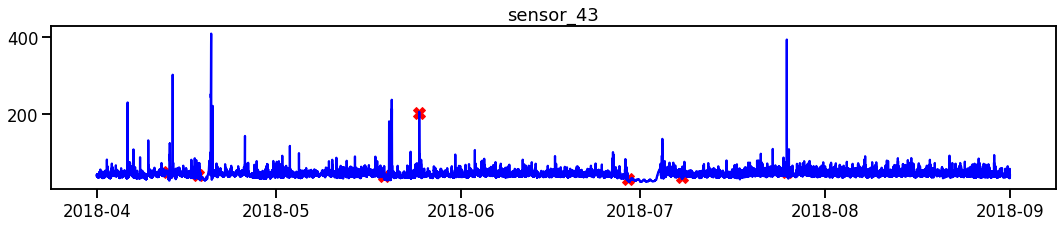

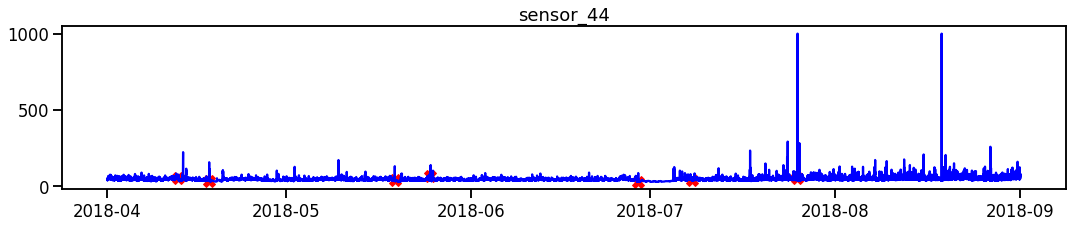

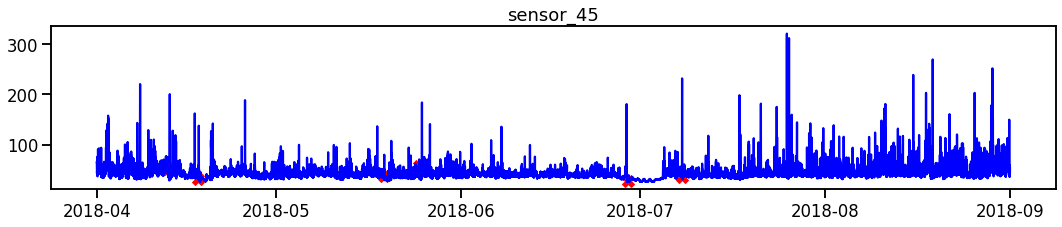

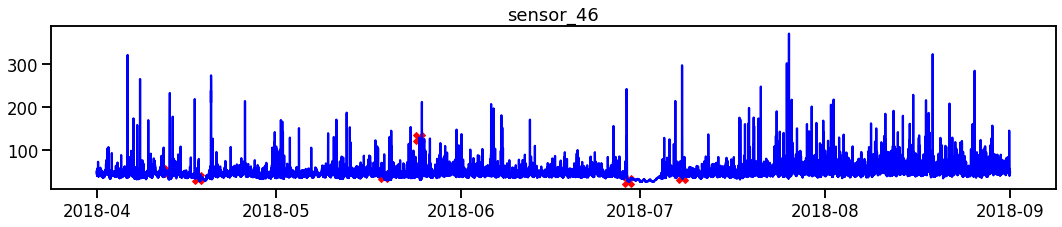

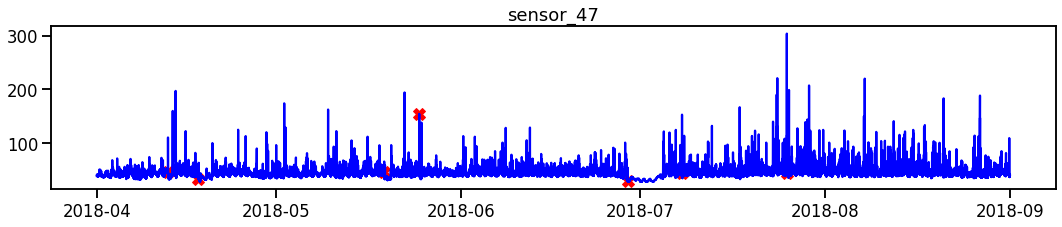

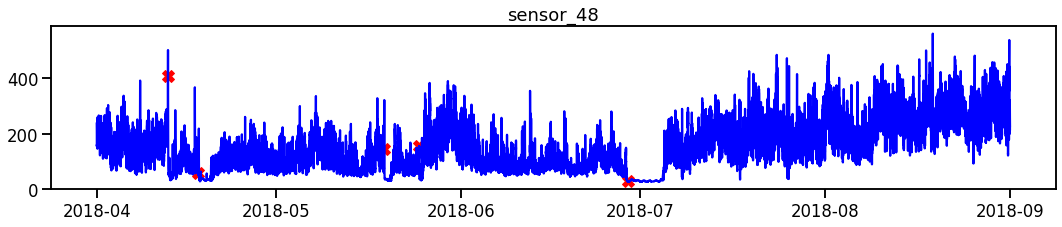

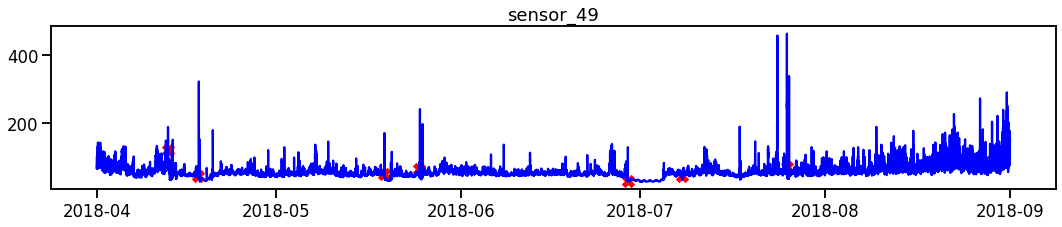

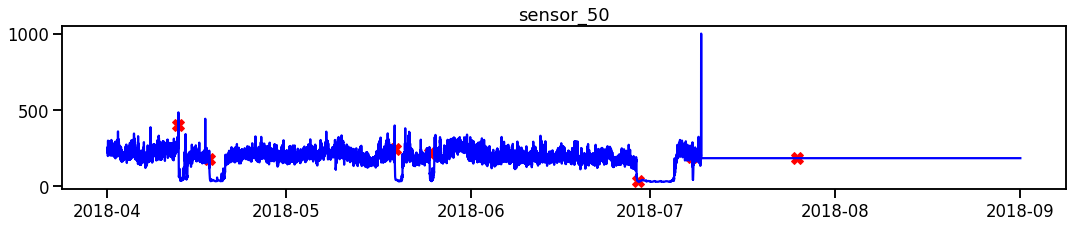

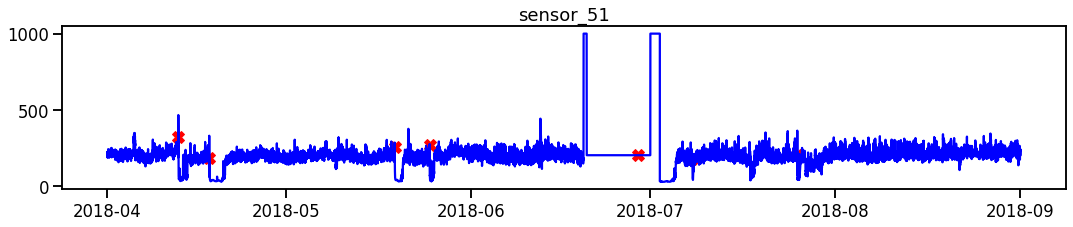

In [ ]:
# Vizualize time series and the BROKEN state (red dots) in the same graph for each sensor
# Extract the readings from BROKEN state and resample by daily average
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

In [ ]:
# Resample the entire dataset by daily average
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()

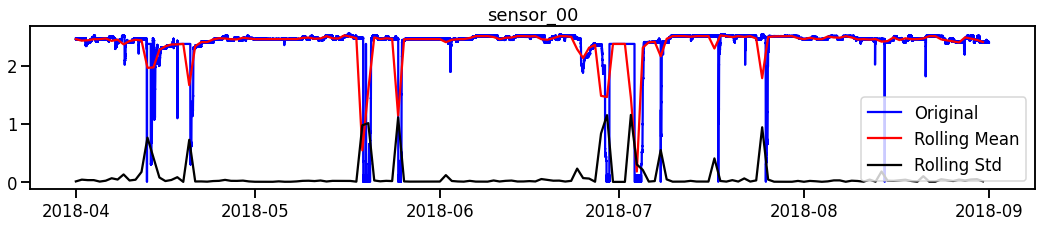

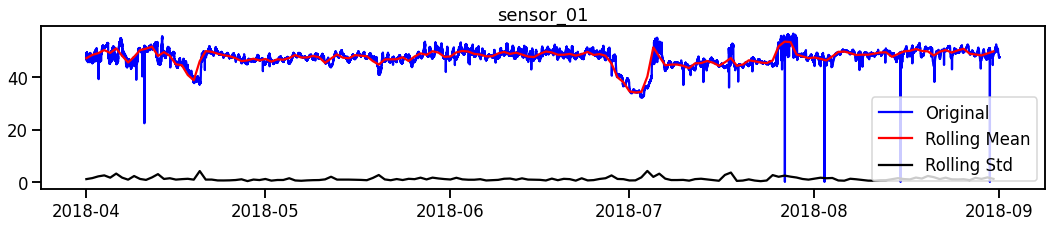

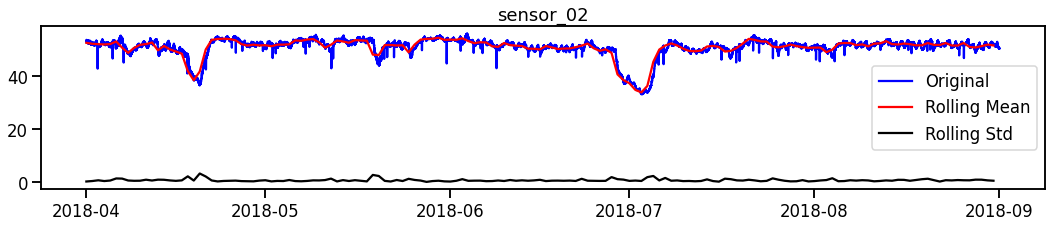

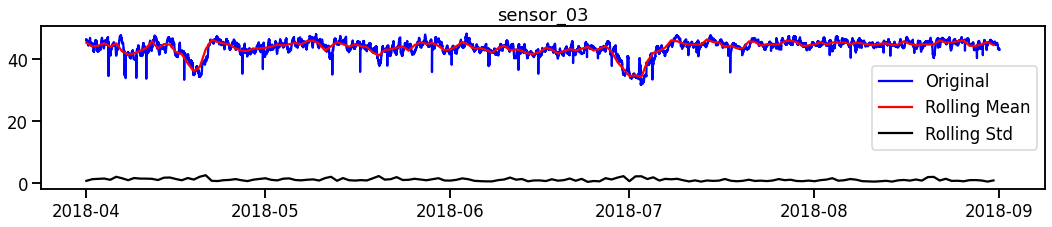

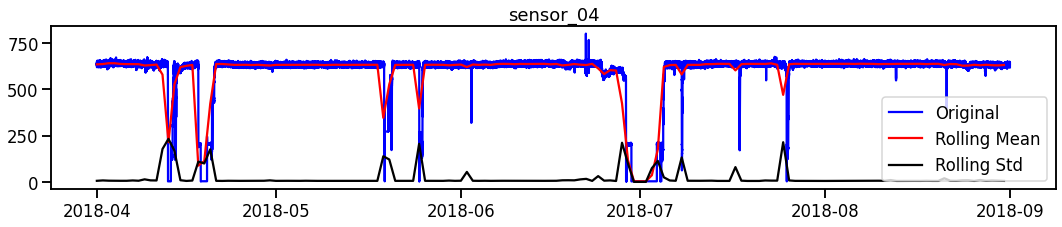

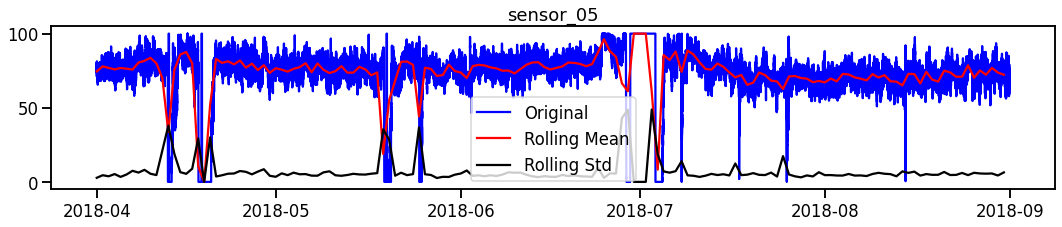

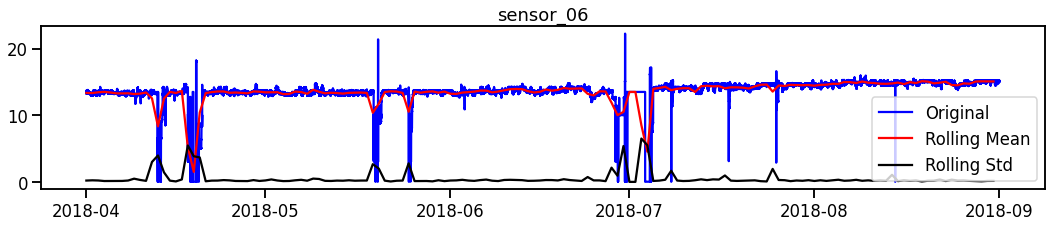

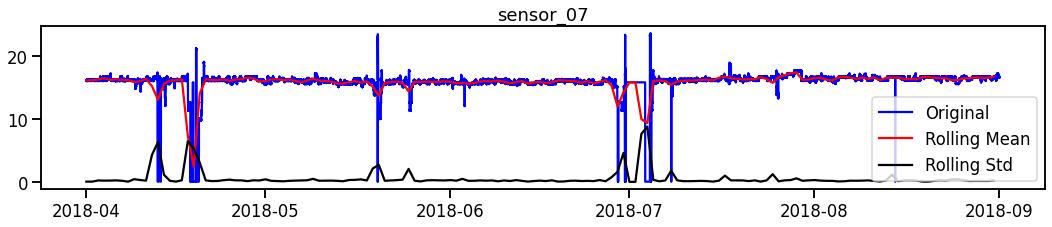

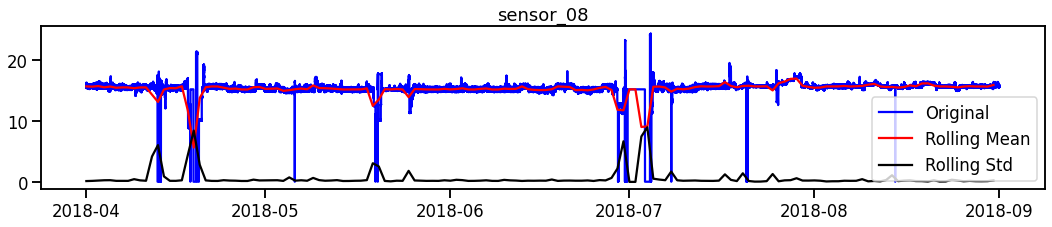

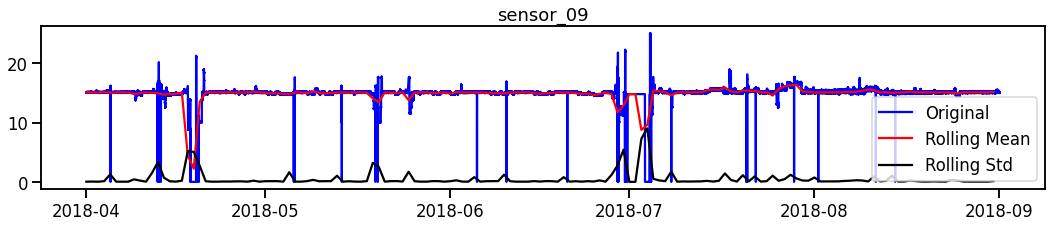

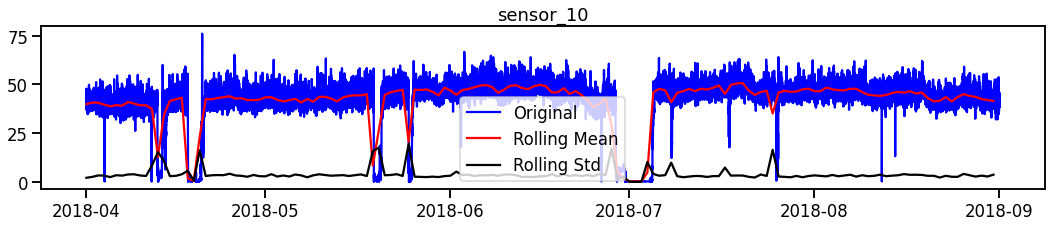

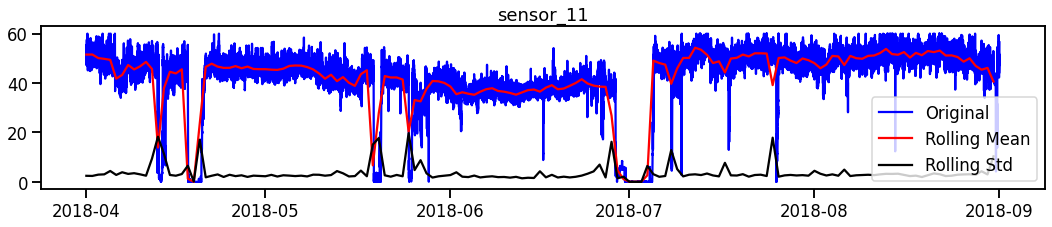

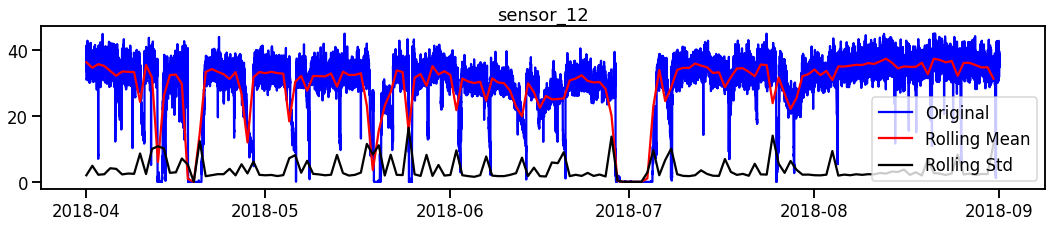

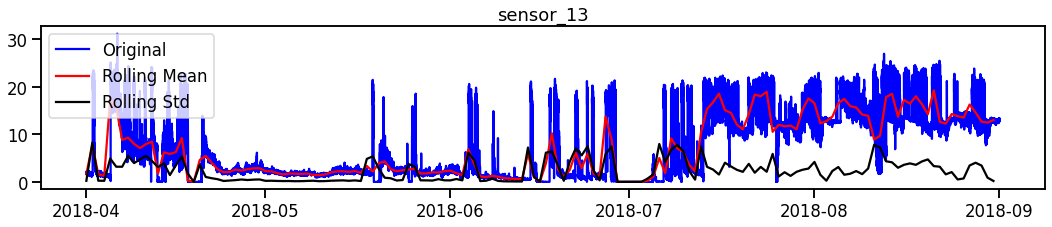

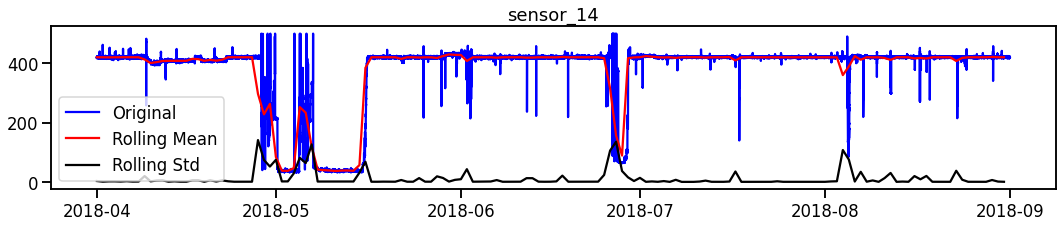

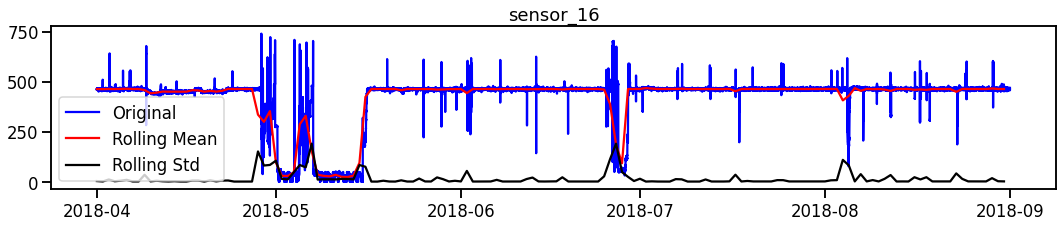

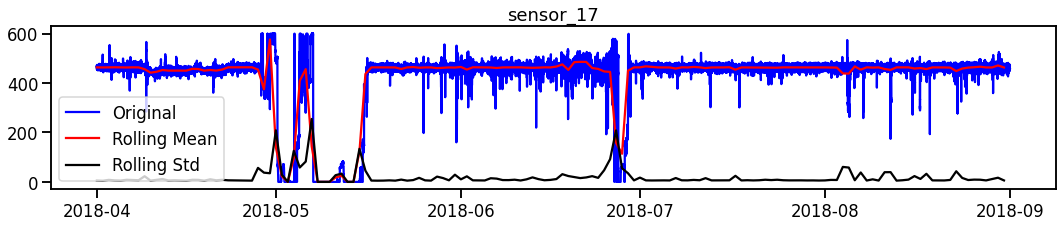

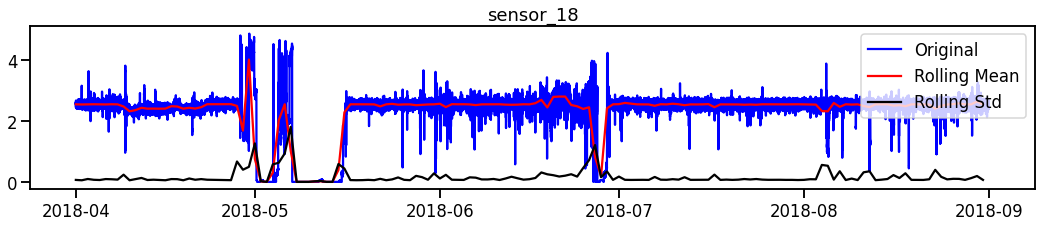

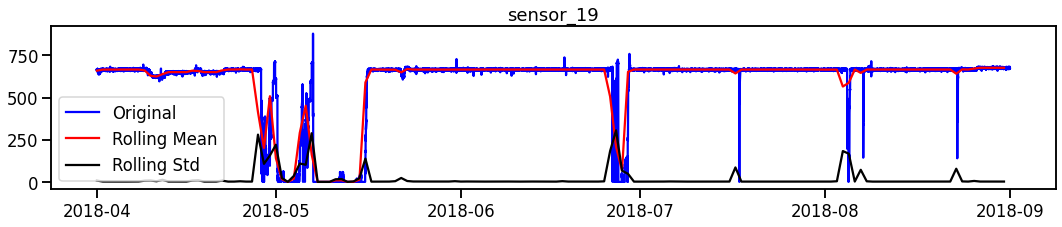

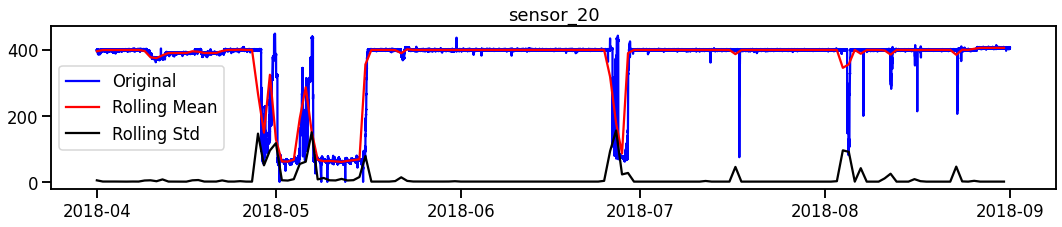

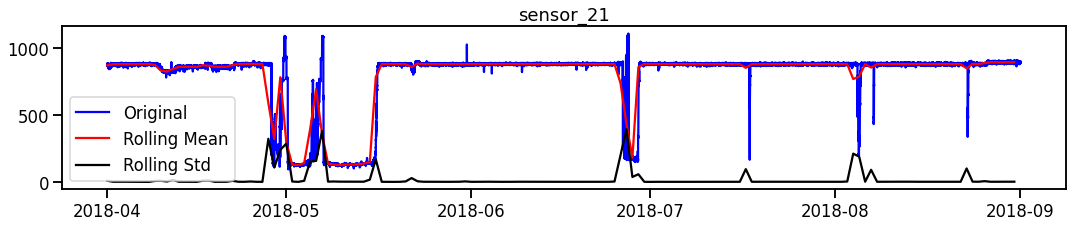

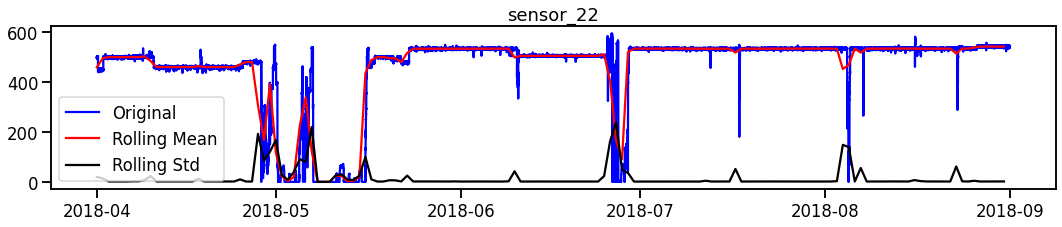

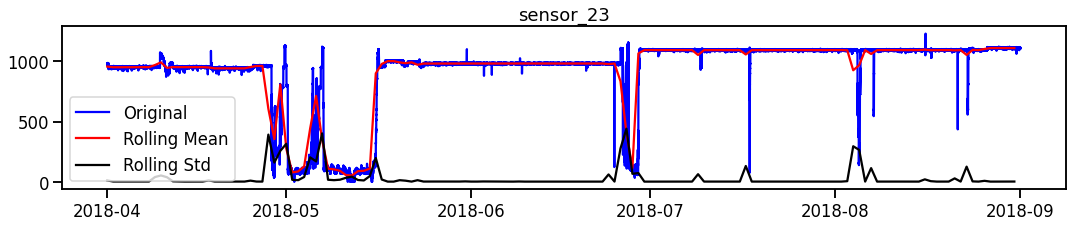

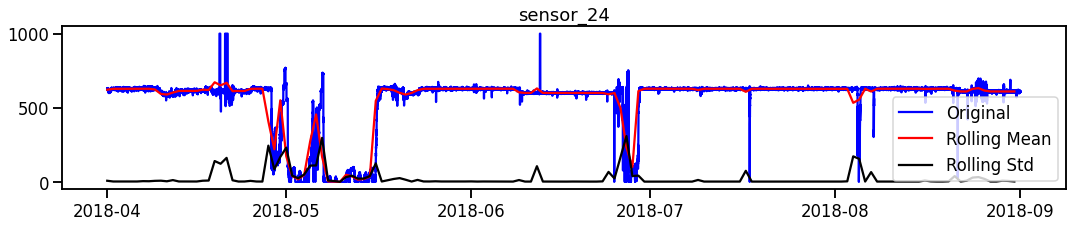

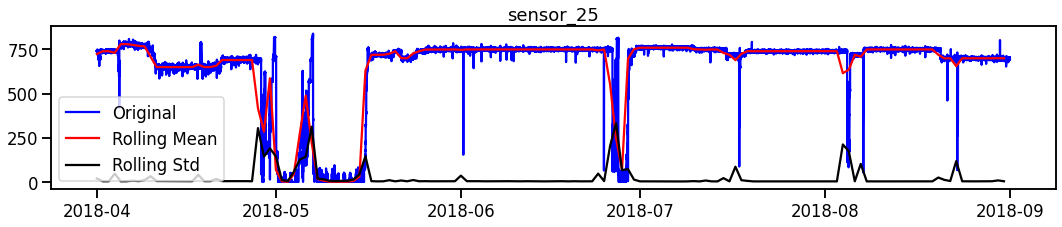

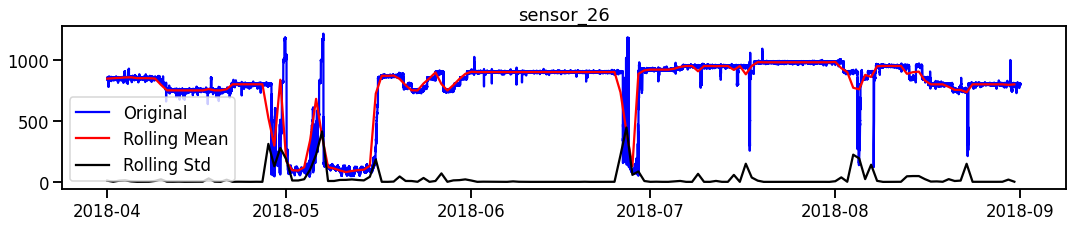

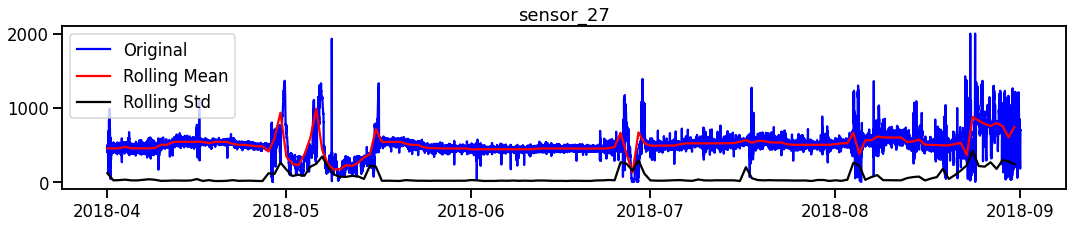

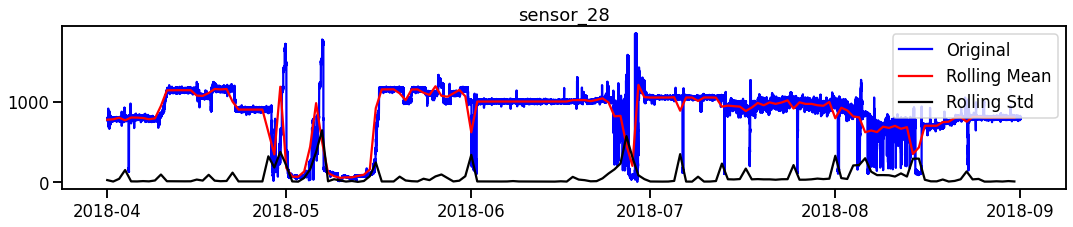

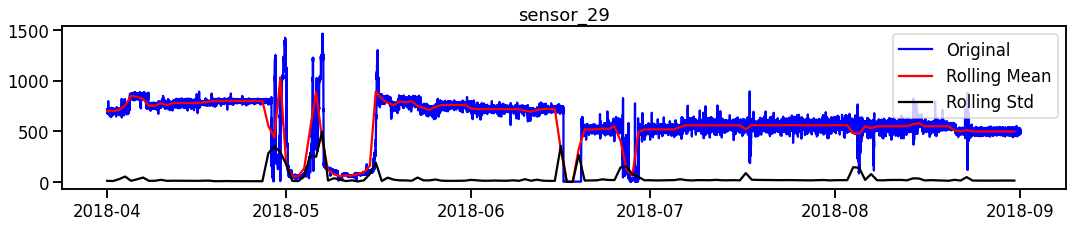

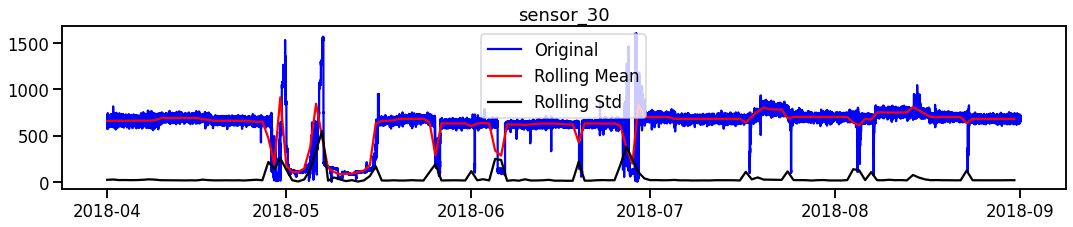

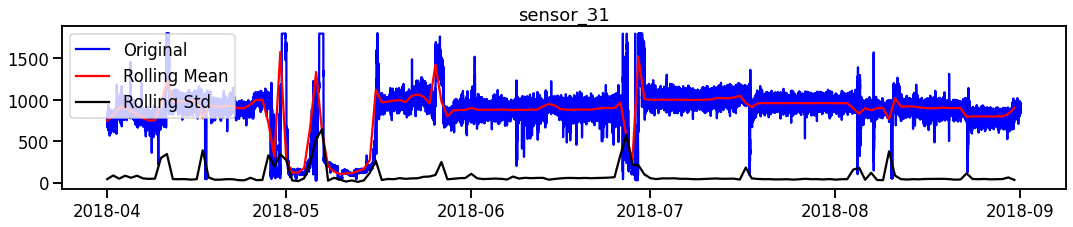

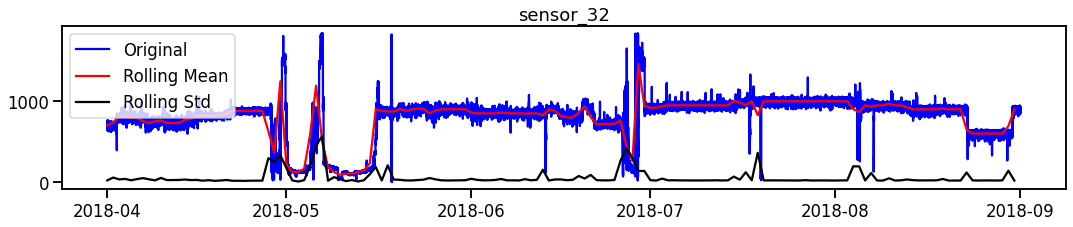

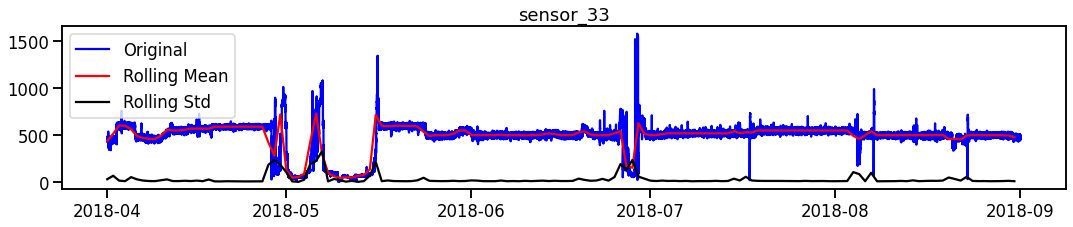

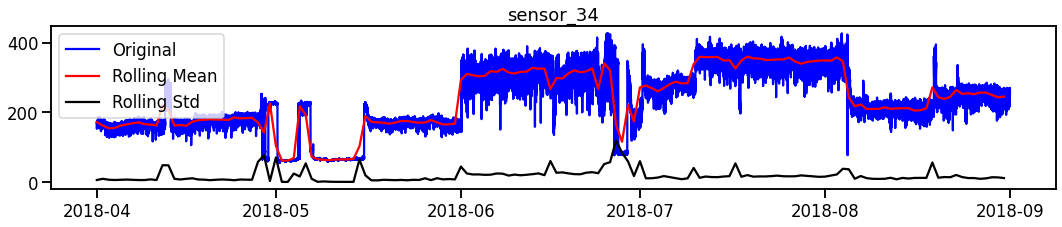

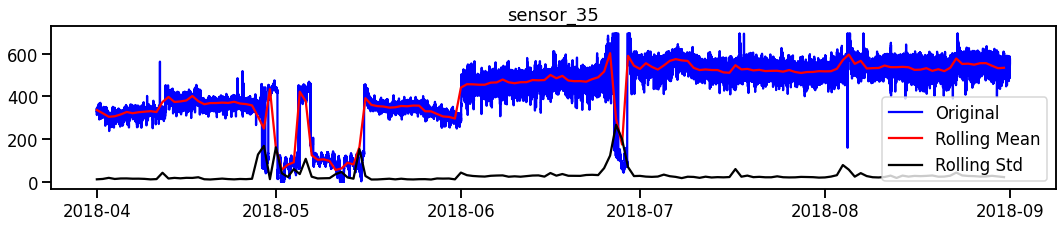

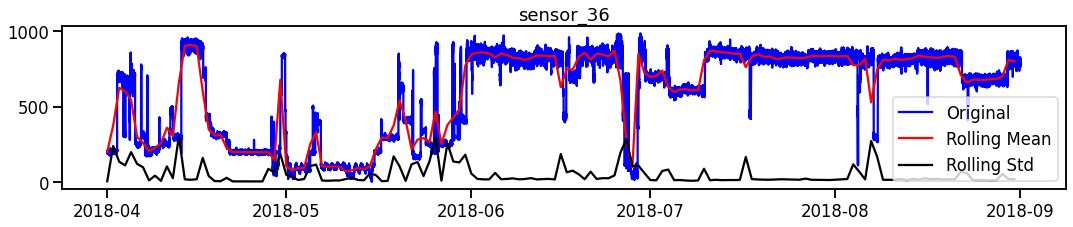

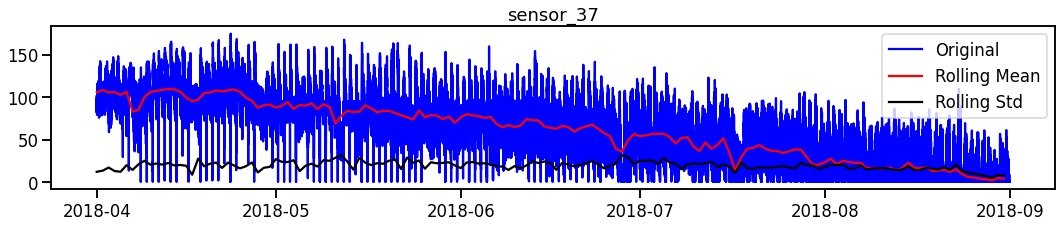

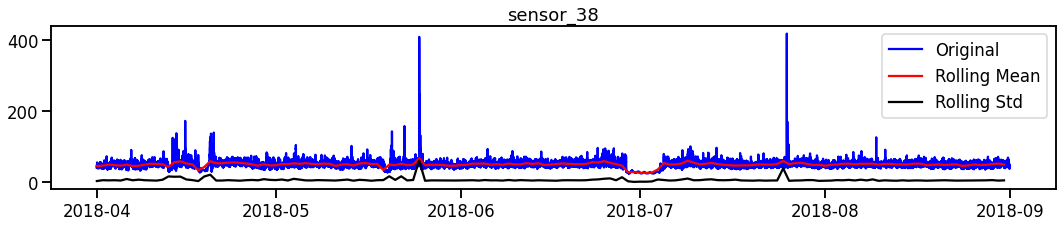

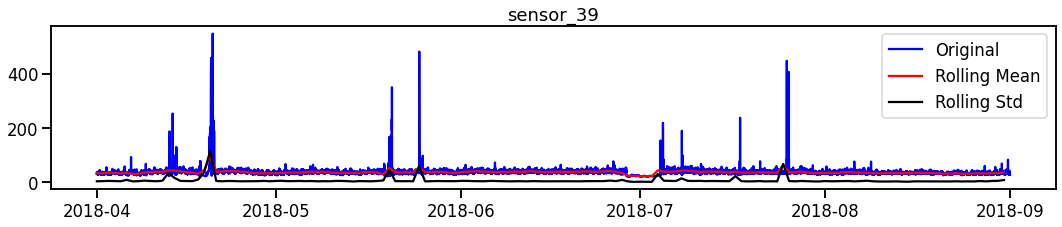

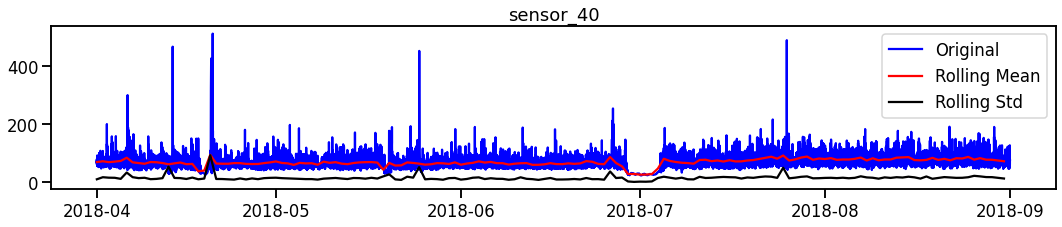

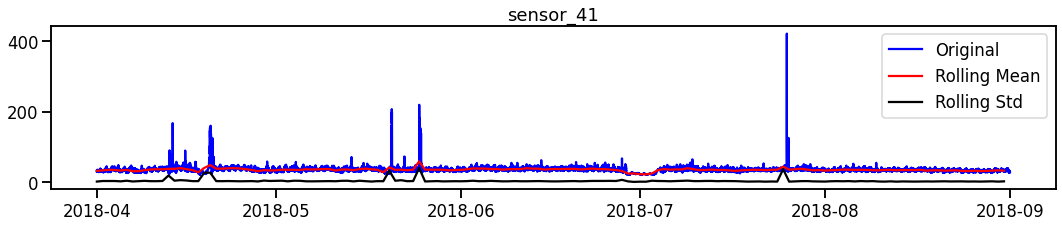

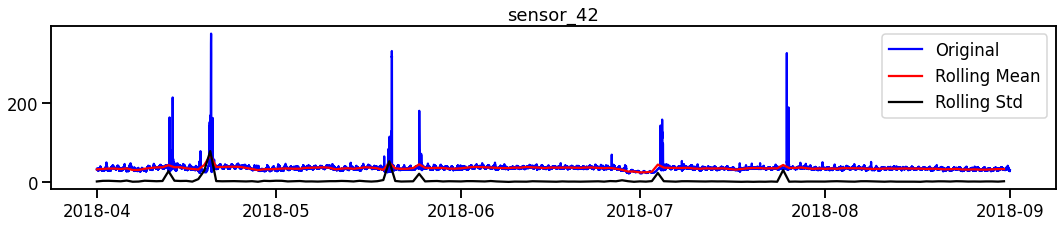

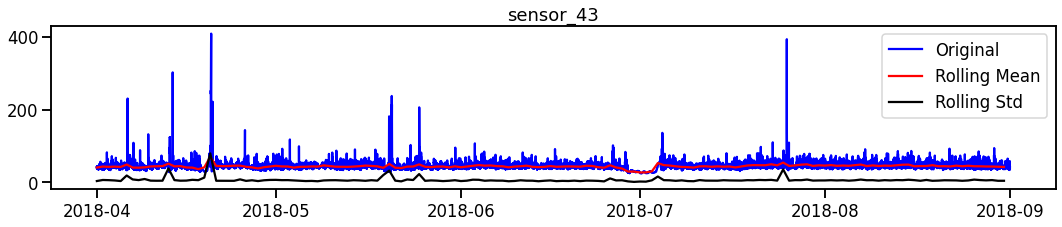

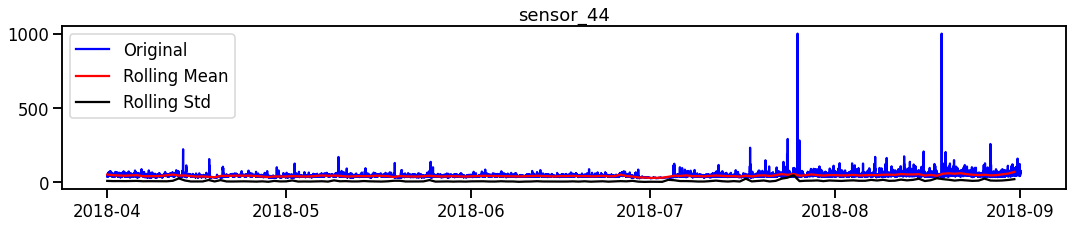

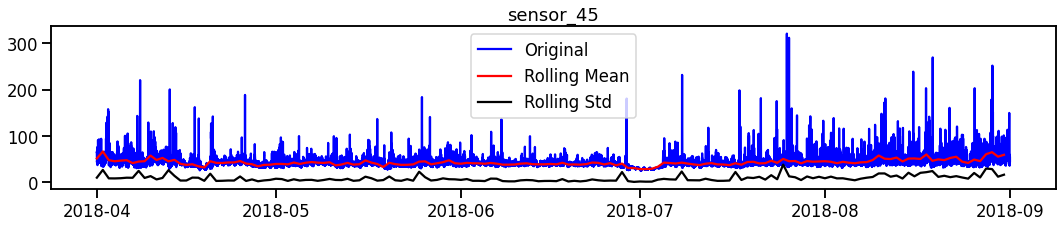

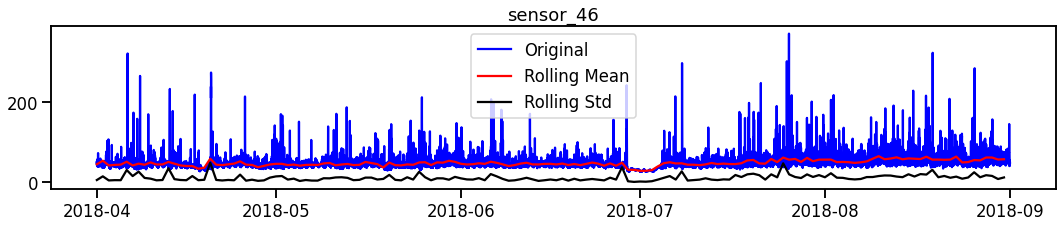

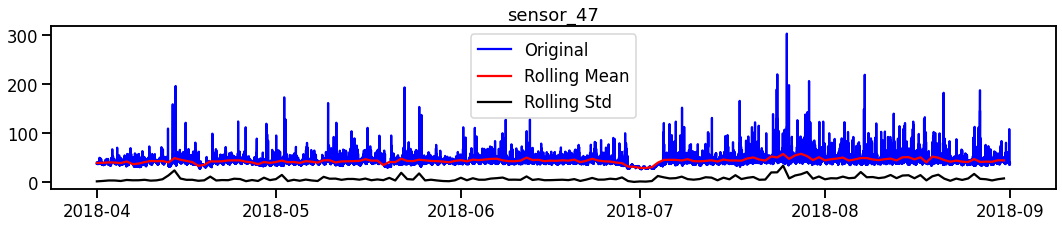

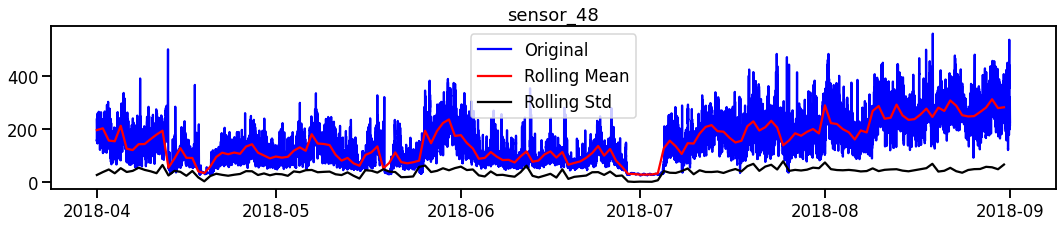

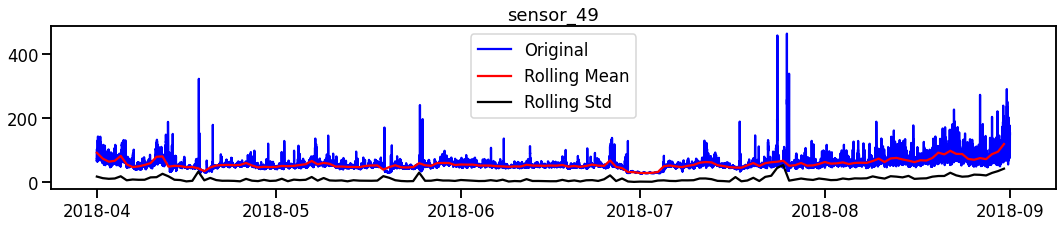

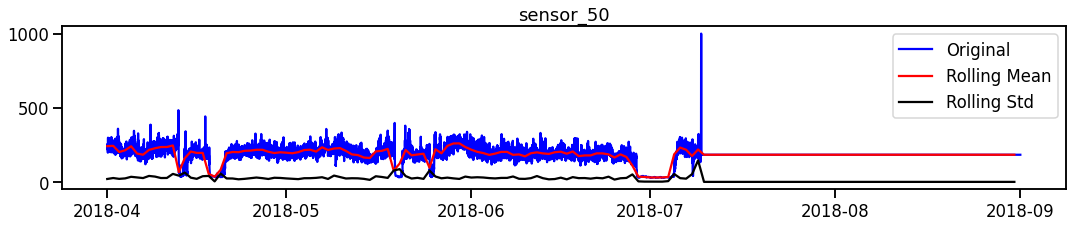

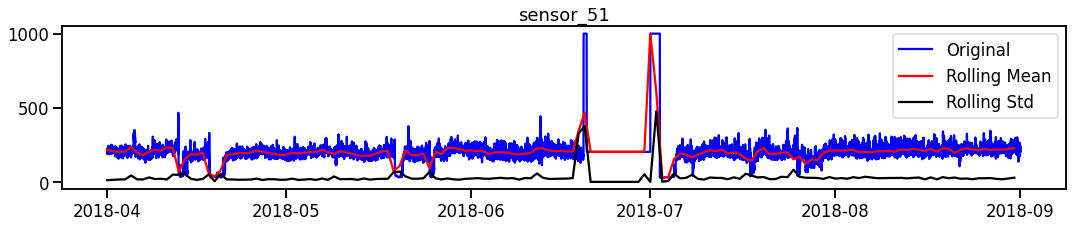

In [ ]:
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

In [ ]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
X = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

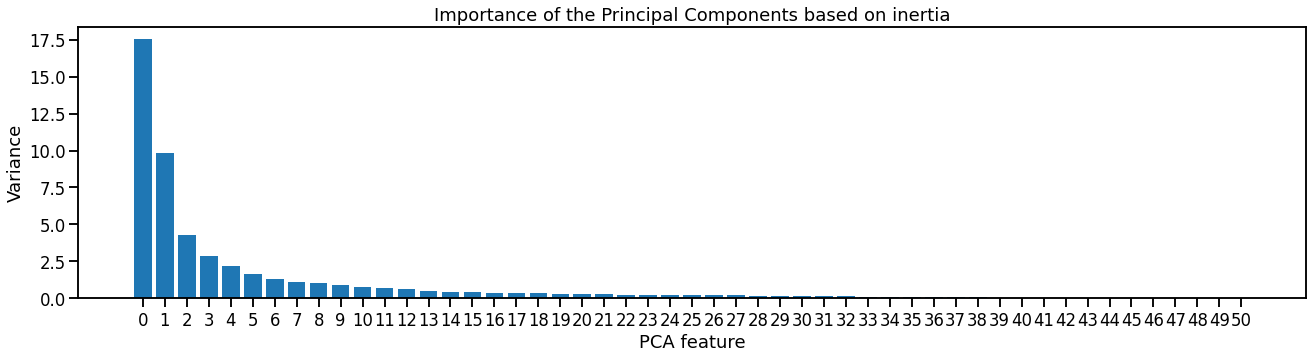

In [ ]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [ ]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [ ]:
df['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)

In [ ]:
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_45  sensor_46  sensor_47  sensor_48  \
date                 ...                                               
2018-04-01 00:00:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:01:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:02:00  ...   65.39352   51.21528  38.194443   155.9606   
2018-04-01 00:03:00  ...   64.81481   51.21528  38.194440   155.9606   
2018-04-01 00:04:00  ...   65.10416   51.79398  38.773150   158.2755   

                     sensor_49  sensor_50  sensor_51  machine_status  \
date                                                                   
2018-04-01 00:00:00   67.70834   243.0556   201.3889          NORMAL   
2018-04-01 00:01:00   67.70834   243.0556   201.3889          NORMAL   
2018-04-01 00:02:00   67.12963   241.3194   203.7037          NORMAL   
2018-04-01 00:03:00   66.84028   240.4514   203.1250          NORMAL   
2018-04-01 00:04:00   66.55093   242.1875   201.3889          NORMAL   

                           pc1         pc2  
date                                        
2018-04-01 00:00:00  72.736850  265.819998  
2018-04-01 00:01:00  72.736850  265.819998  
2018-04-01 00:02:00  30.802311  283.470003  
2018-04-01 00:03:00  27.329130  290.144344  
2018-04-01 00:04:00  32.911764  294.766508  

[5 rows x 54 columns]

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

5.4536849418489635e-05


In [ ]:
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

1.890914237087845e-06


In [ ]:
# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.0020511948219784537


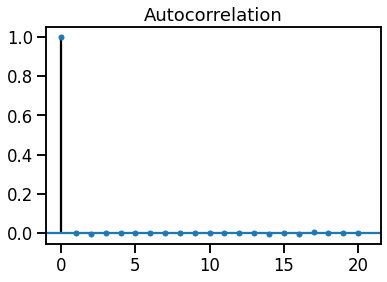

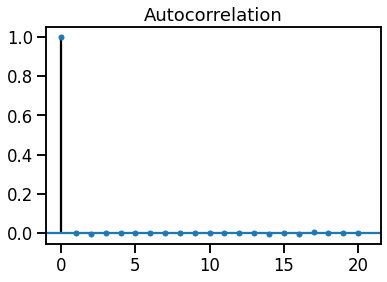

In [ ]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

Autocorrelation is:  -3.15159411274449e-05


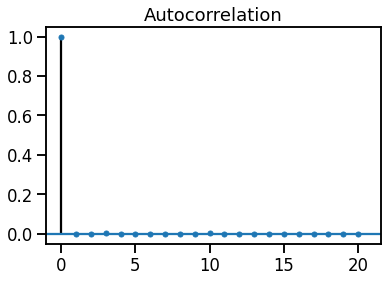

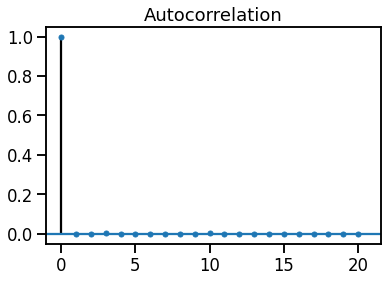

In [ ]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

In [ ]:
# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)
# Calculate outlier bounds for pc1
q1_pc1, q3_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [ ]:
lower_pc1, upper_pc1, lower_pc2, upper_pc2

(-736.3329510286113, 222.73590494562316, -738.2364726970206, 683.9742720617356)

In [ ]:
df['anomaly_pc1'] = ((df['pc1']>upper_pc1) | (df['pc1']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['pc2']>upper_pc2) | (df['pc2']<lower_pc2)).astype('int')

In [ ]:
df['anomaly_pc1'].value_counts()

0    189644
1     29877
Name: anomaly_pc1, dtype: int64

In [ ]:
df['anomaly_pc2'].value_counts()

0    217947
1      1574
Name: anomaly_pc2, dtype: int64

In [ ]:
outliers_pc1 = df.loc[(df['pc1']>upper_pc1) | (df['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df.loc[(df['pc2']>upper_pc2) | (df['pc2']<lower_pc2), 'pc2']

In [ ]:
len(outliers_pc1)/len(df)

0.13610087417604694

In [ ]:
len(outliers_pc2)/len(df)

0.0071701568414866915

In [ ]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['machine_status']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10106.761967
12  sensor_12   9879.052739
4   sensor_04   8167.176442


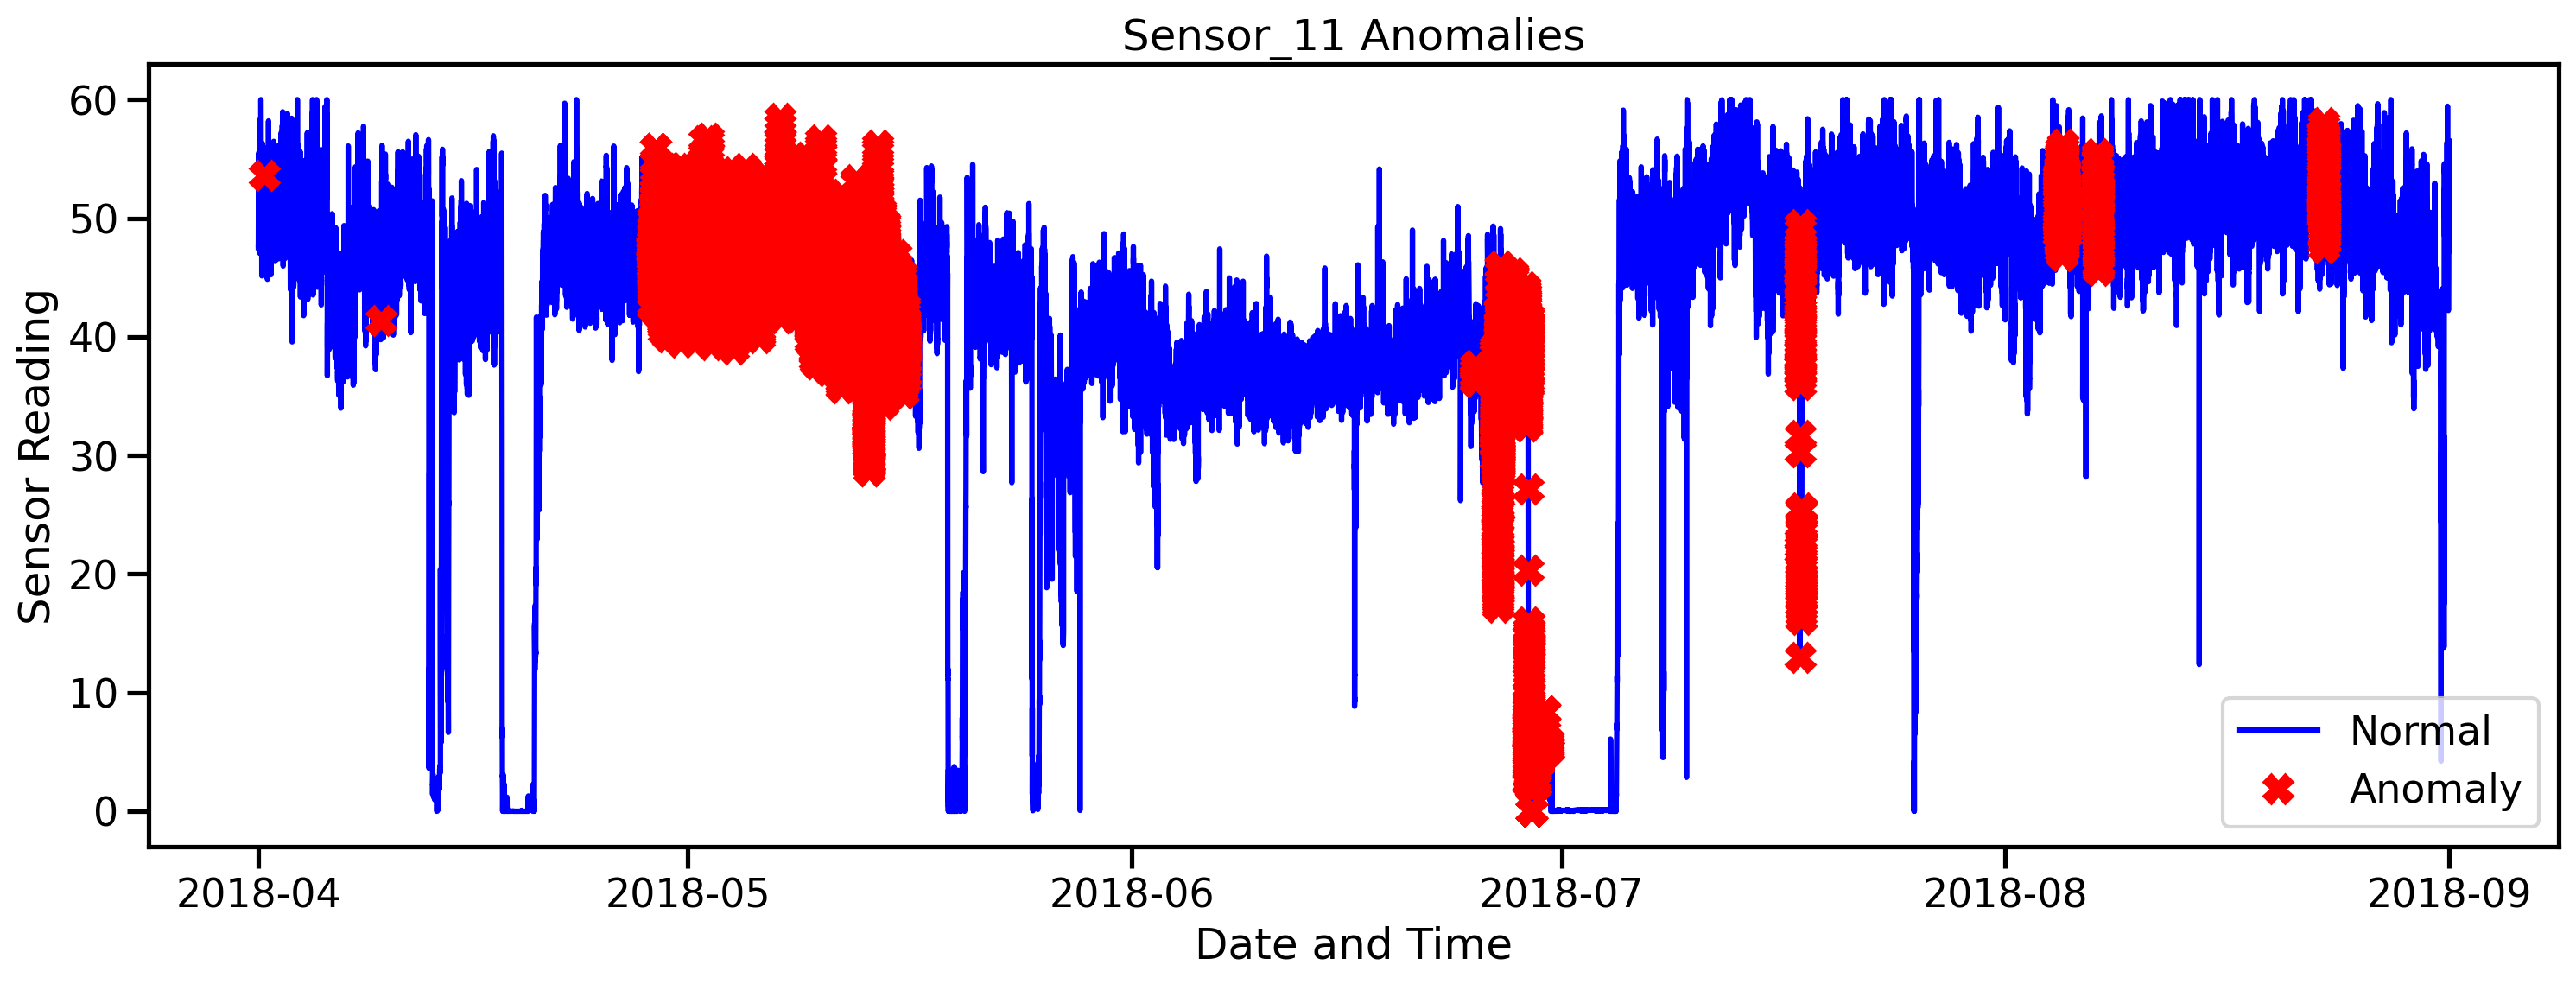

In [ ]:
# Let's plot the outliers from pc1 on top of the sensor_11 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6),dpi=200)
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
# I will start k-means clustering with k=2 as I already know that there are 3 classes of "NORMAL" vs 
# "NOT NORMAL" which are combination of BROKEN" and"RECOVERING"
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

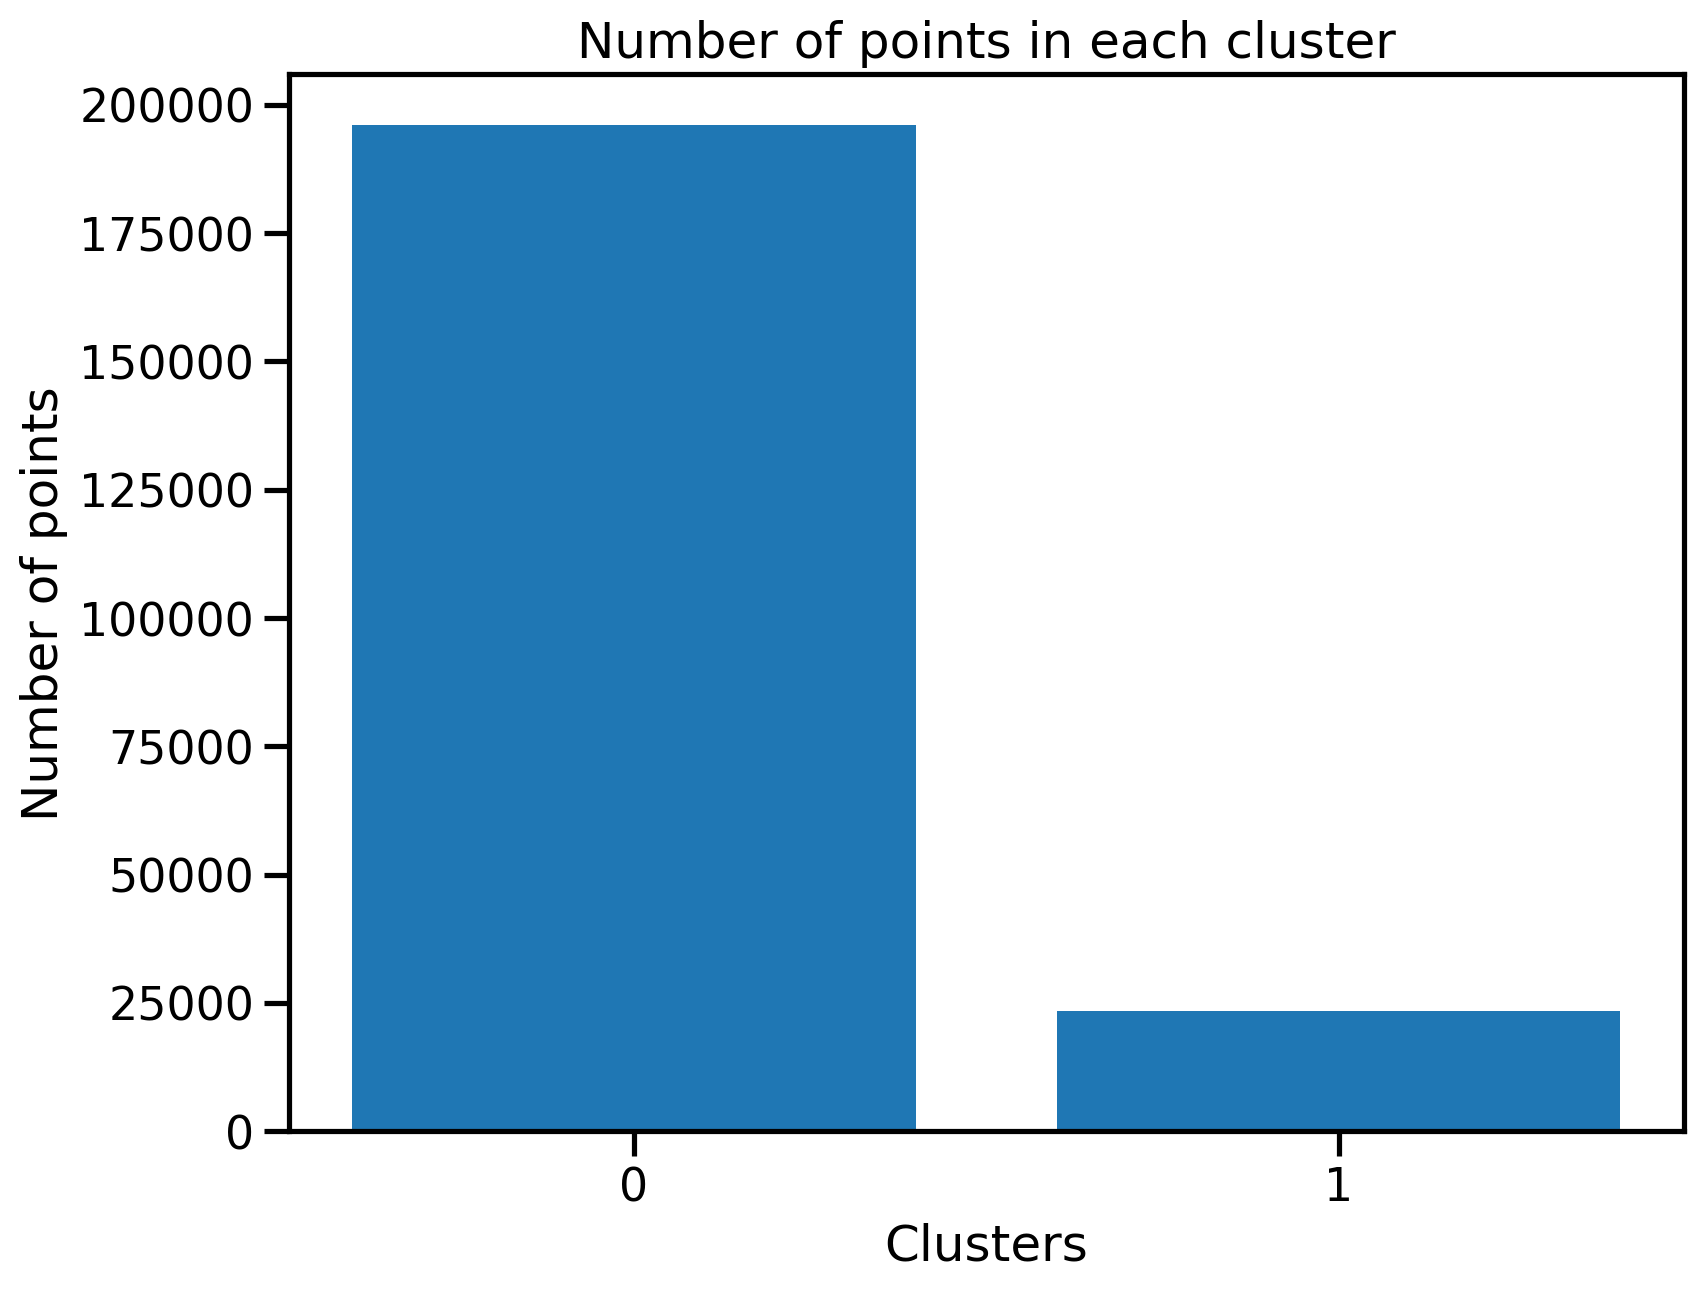

In [ ]:
_ = plt.figure(figsize = (9, 7),dpi=200)
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

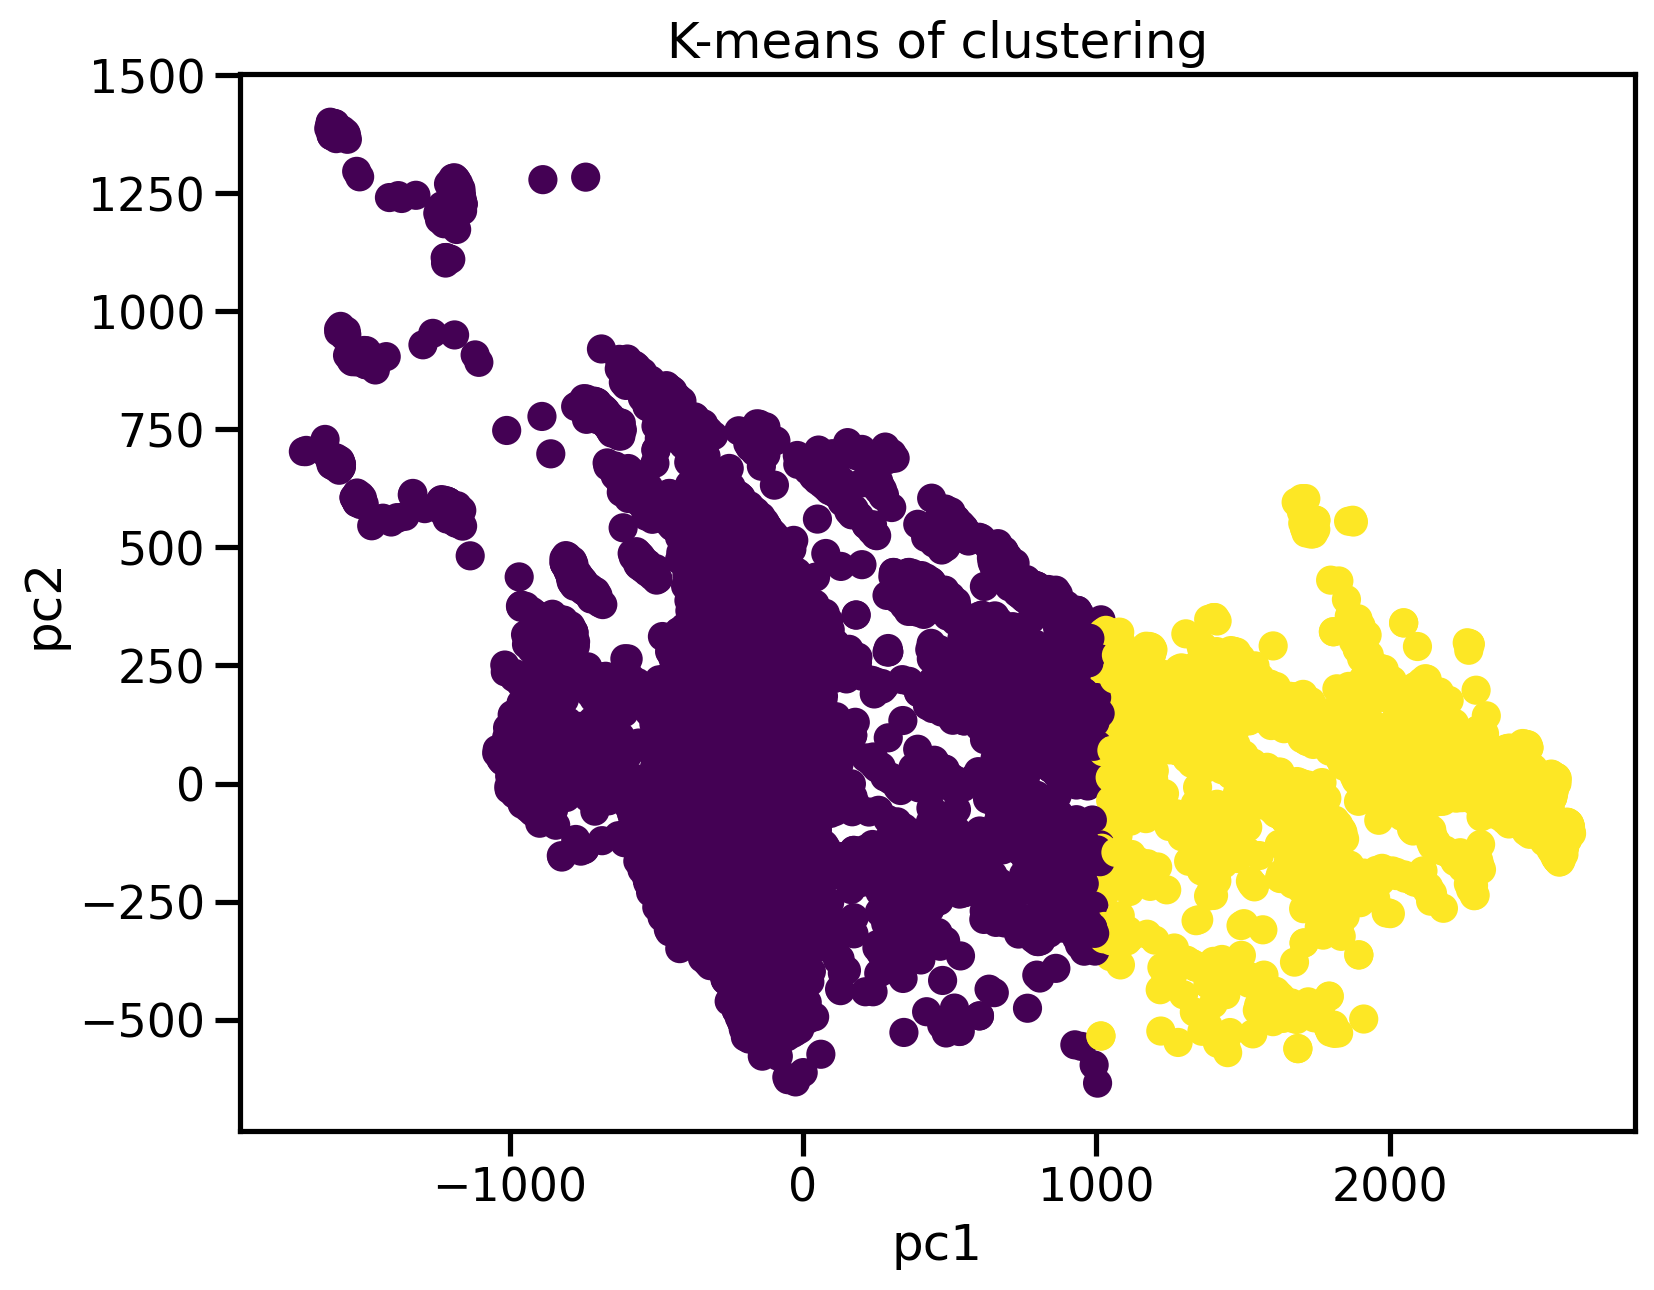

In [ ]:
_ = plt.figure(figsize=(9,7),dpi=200)
_ = plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

In [ ]:
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [ ]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principalDf['anomaly1'] = (distance >= threshold).astype(int)

In [ ]:
principalDf.head()

pc1         pc2  anomaly1
0  72.736850  265.819998         0
1  72.736850  265.819998         0
2  30.802311  283.470003         0
3  27.329130  290.144344         0
4  32.911764  294.766508         0

In [ ]:
principalDf['anomaly1'].value_counts()

0    190984
1     28537
Name: anomaly1, dtype: int64

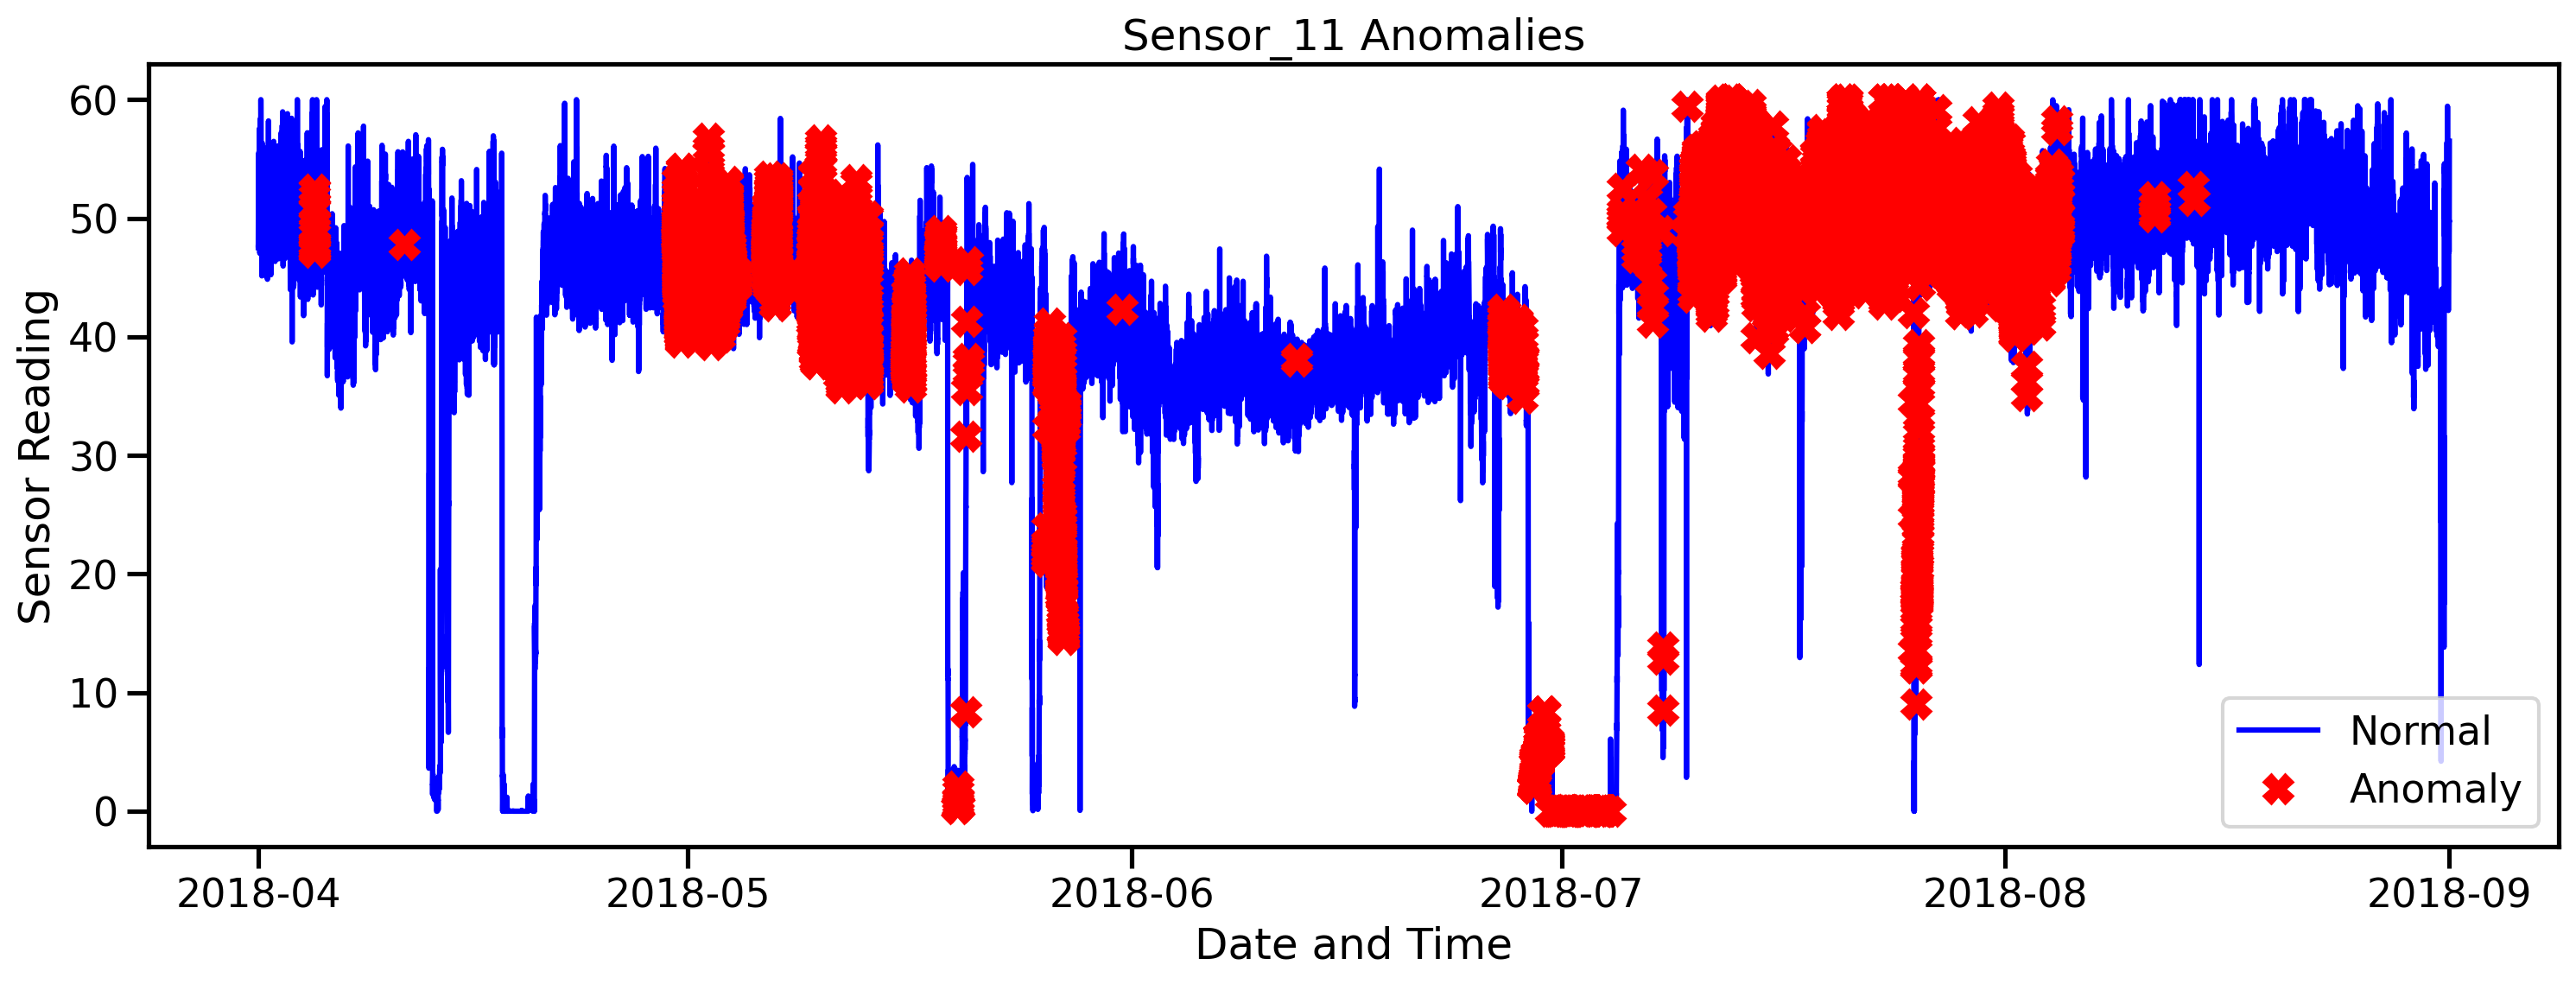

In [ ]:
df['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=df.index)
a = df[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6),dpi=200)
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))

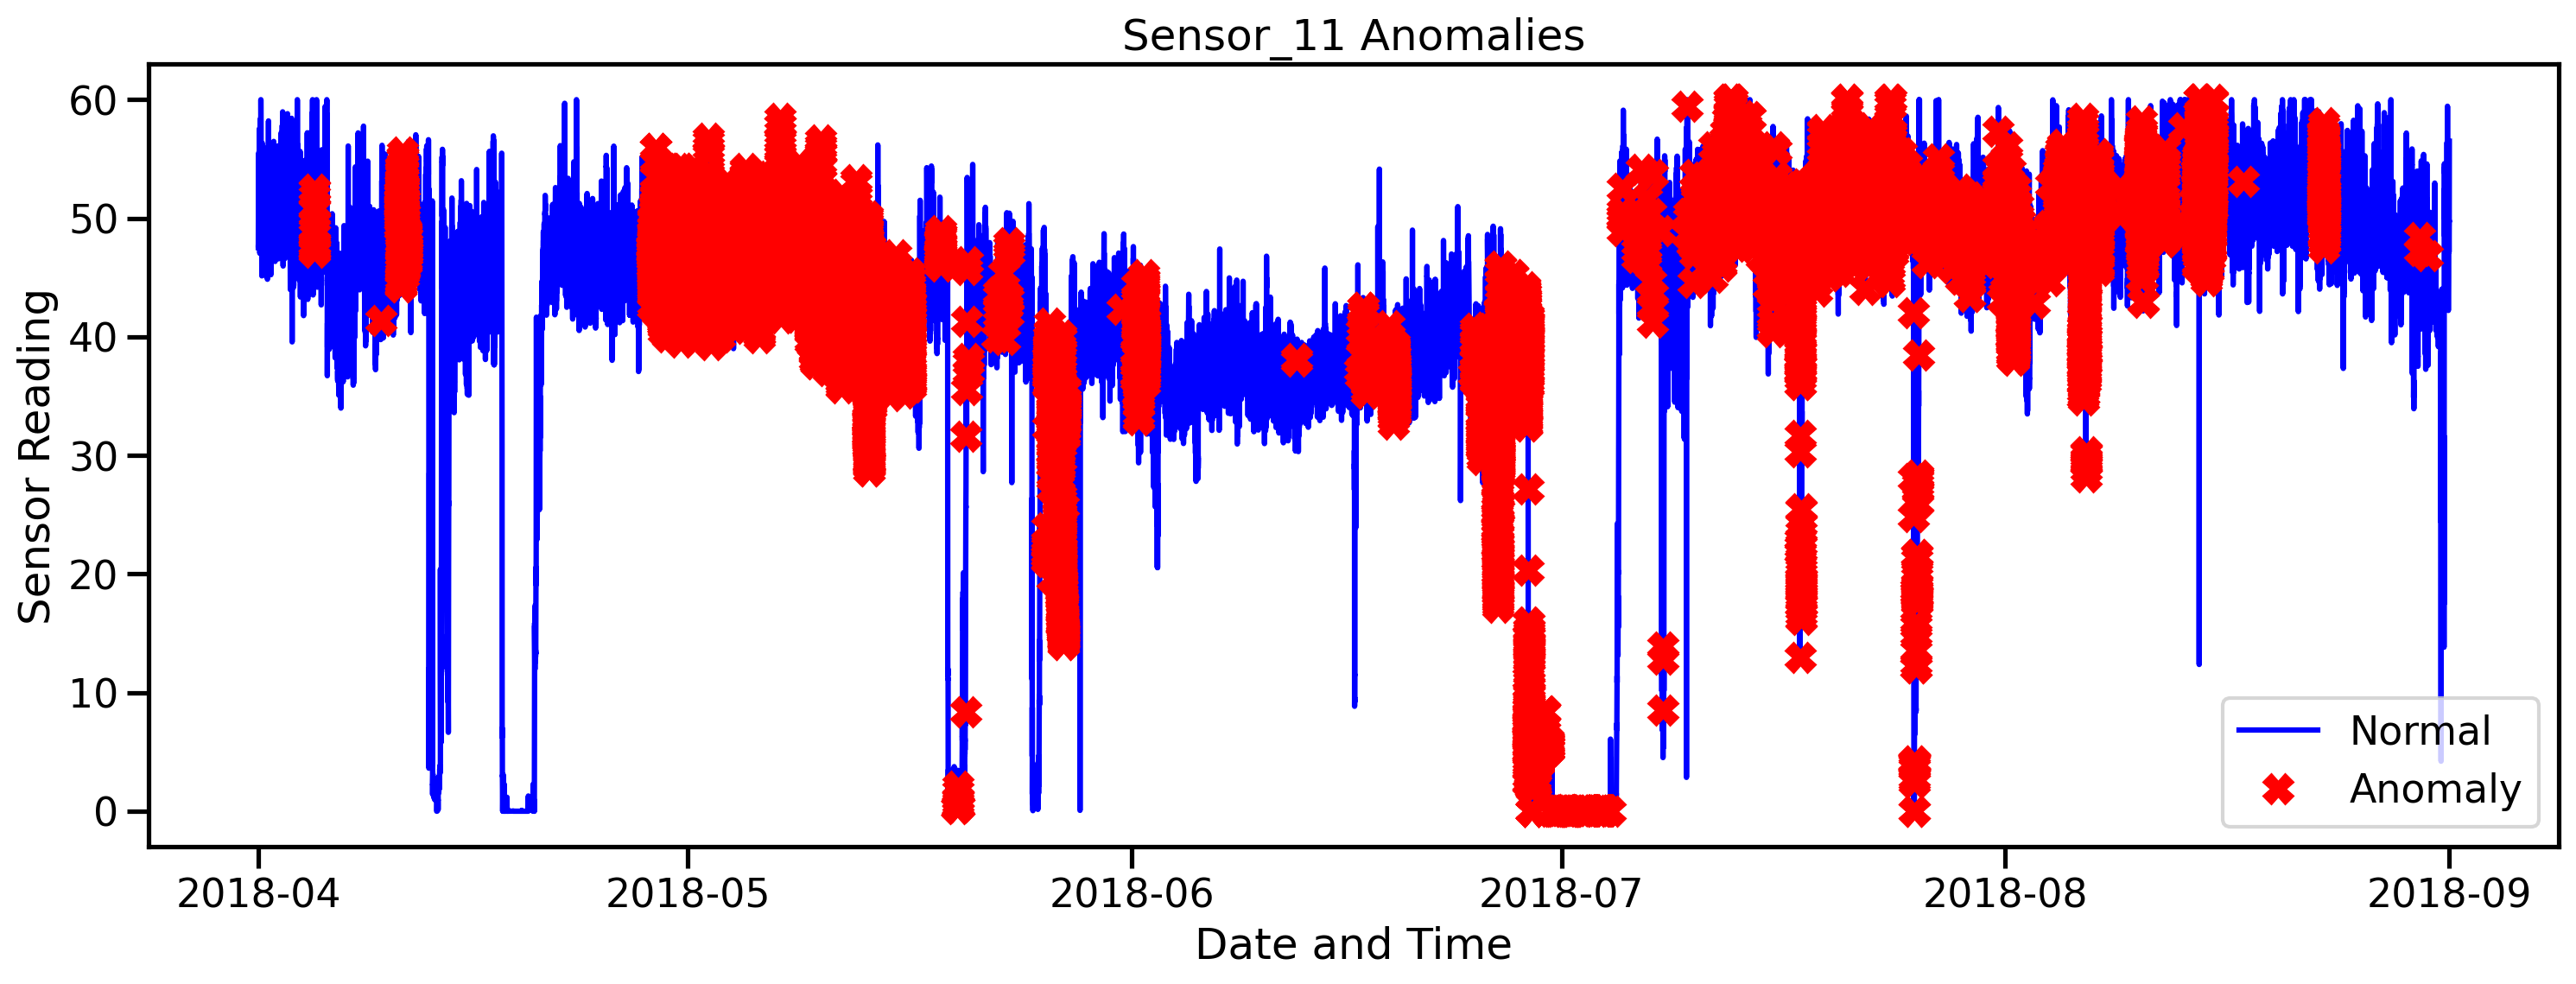

In [ ]:
# visualization
df['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=df.index)
a = df.loc[df['anomaly2'] == -1] #anomaly
_ = plt.figure(figsize=(18,6),dpi=200)
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
df['anomaly2'].value_counts()

 1    190988
-1     28533
Name: anomaly2, dtype: int64

In [95]:
model1 = pd.DataFrame({
    'Class': ['0 (Normal)', '1 (Anomaly)'],
    'Score': [189644,29877]})
model1 = model1.to_string(index=False)

model2 = pd.DataFrame({
    'Class': ['0 (Normal)', '1 (Anomaly)'],
    'Score': [190984,28537]})
print("Anomalies detected By K-Means")
model2 = model2.to_string(index=False)
print(model2)
model3 = pd.DataFrame({
    'Class': ['0 (Normal)', '1 (Anomaly)'],
    'Score': [190983,28538]})
print("Anomalies detected By Isolation Forest")
model3 = model3.to_string(index=False)
print(model3)

Anomalies detected By K-Means
      Class  Score
 0 (Normal) 190984
1 (Anomaly)  28537
Anomalies detected By Isolation Forest
      Class  Score
 0 (Normal) 190983
1 (Anomaly)  28538


**`Our Work`**

In [ ]:
# Import Dependencies
%matplotlib inline
import time

# Data Manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math, time, random, datetime

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [ ]:
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_49  sensor_50  sensor_51  machine_status  \
date                 ...                                                    
2018-04-01 00:00:00  ...   67.70834   243.0556   201.3889          NORMAL   
2018-04-01 00:01:00  ...   67.70834   243.0556   201.3889          NORMAL   
2018-04-01 00:02:00  ...   67.12963   241.3194   203.7037          NORMAL   
2018-04-01 00:03:00  ...   66.84028   240.4514   203.1250          NORMAL   
2018-04-01 00:04:00  ...   66.55093   242.1875   201.3889          NORMAL   

                           pc1         pc2  anomaly_pc1  anomaly_pc2  \
date                                                                   
2018-04-01 00:00:00  72.736850  265.819998            0            0   
2018-04-01 00:01:00  72.736850  265.819998            0            0   
2018-04-01 00:02:00  30.802311  283.470003            0            0   
2018-04-01 00:03:00  27.329130  290.144344            0            0   
2018-04-01 00:04:00  32.911764  294.766508            0            0   

                     anomaly1  anomaly2  
date                                     
2018-04-01 00:00:00         0         1  
2018-04-01 00:01:00         0         1  
2018-04-01 00:02:00         0         1  
2018-04-01 00:03:00         0         1  
2018-04-01 00:04:00         0         1  

[5 rows x 58 columns]

In [ ]:
X = df.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2', 'anomaly1', 'anomaly2'], axis=1)
y = df['machine_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc_train = round(model.score(X_train, y_train) * 100, 2)
    acc_test = round(model.score(X_test, y_test) * 100, 2)
    
    
    return acc_train, acc_test

In [ ]:
# LogisticRegression
start_time = time.time()
acc_train_log, acc_test_log = fit_ml_algo(LogisticRegression(), X_train, y_train)
log_time = (time.time() - start_time)
print("Accuracy Training: %s" % acc_train_log)
print("Accuracy Test: %s" % acc_test_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy Training: 99.52
Accuracy Test: 99.5
Running Time: 0:00:16.939885


In [ ]:
# k-Nearest Neighbours
start_time = time.time()
acc_train_knn, acc_test_knn = fit_ml_algo(KNeighborsClassifier(), X_train, y_train)
knn_time = (time.time() - start_time)
print("Accuracy Training: %s" % acc_train_knn)
print("Accuracy Test: %s" % acc_test_knn)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy Training: 99.98
Accuracy Test: 99.96
Running Time: 0:00:16.939885


In [ ]:
# SVM
start_time = time.time()
acc_train_svc, acc_test_svc = fit_ml_algo(LinearSVC(), X_train, y_train)
svc_time = (time.time() - start_time)
print("Accuracy Training: %s" % acc_train_svc)
print("Accuracy Test: %s" % acc_test_svc)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy Training: 99.71
Accuracy Test: 99.69
Running Time: 0:00:16.939885


In [ ]:
# Decision Tree 
start_time = time.time()
acc_train_dt, acc_test_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, y_train)
dt_time = (time.time() - start_time)
print("Accuracy Training: %s" % acc_train_dt)
print("Accuracy Test: %s" % acc_test_dt)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy Training: 100.0
Accuracy Test: 99.97
Running Time: 0:00:16.939885


In [ ]:
# Random Forest
start_time = time.time()
acc_train_rdf, acc_test_rdf = fit_ml_algo(RandomForestClassifier(), X_train, y_train)
rdf_time = (time.time() - start_time)
print("Accuracy Training: %s" % acc_train_rdf)
print("Accuracy Test: %s" % acc_test_rdf)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy Training: 100.0
Accuracy Test: 99.99
Running Time: 0:00:16.939885


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Linear SVC', 
              'Decision Tree','Random Forest'],
    'Train_Score': [
        acc_train_log,
        acc_train_knn,
        acc_train_svc,
        acc_train_dt,
        acc_train_rdf
    ],
    'Test_Score': [
        acc_test_log,
        acc_test_knn,
        acc_test_svc,
        acc_test_dt,
        acc_test_rdf
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Test_Score', ascending=False)

---Reuglar Accuracy Scores---


Model  Train_Score  Test_Score
4        Random Forest       100.00       99.99
3        Decision Tree       100.00       99.97
1                  KNN        99.98       99.96
2           Linear SVC        99.71       99.69
0  Logistic Regression        99.52       99.50

In [90]:
# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the test set
accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 1.00


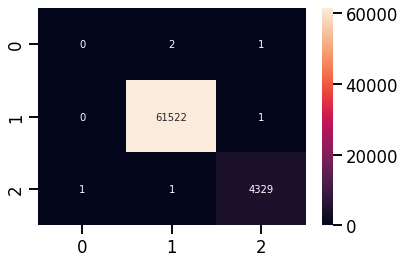

In [93]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Display the confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

In [94]:
y_test

date
2018-07-18 08:16:00    NORMAL
2018-06-27 00:00:00    NORMAL
2018-04-14 03:44:00    NORMAL
2018-04-29 12:48:00    NORMAL
2018-06-18 19:57:00    NORMAL
                        ...  
2018-05-21 17:53:00    NORMAL
2018-05-18 07:23:00    NORMAL
2018-08-05 03:53:00    NORMAL
2018-05-11 15:43:00    NORMAL
2018-05-01 07:41:00    NORMAL
Name: machine_status, Length: 65857, dtype: object